# Working with GDP data

### Introduction
This notebook aims to visualize the positions of drifters at a specific time and also to identify those emitting inertial oscillations.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Data Product: Global Drifter Program Current of NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 136
  - link : https://erddap.aoml.noaa.gov/gdp/erddap/tabledap/drifter_6hour_qc.html
  - period : 2023-03-30 to 2023-07-09
    
### Tasks

#### 1. Drifter positions
- Visualization of the positions drifters at a specific time.

#### 2. Inertial oscillation
- Identification of drifters emitting inertial oscillations.

#### 1. Drifter positions

## Import Library

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.fft import fft, fftfreq

## Read Drifter Data

In [2]:
fn='./drifter_6hour_qc_fd8f_7e60_6f21_U1722421804537.nc';
ds=xr.open_dataset(fn);

## Extract Coordinates and Variables

In [3]:
ve_curr = ds.ve.values
vn_curr = ds.vn.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values   

## Creation of Pandas Array for Drifter Data

In [4]:
data = {
    'Longitude': lon,
    'Latitude' : lat,
    'time'     : time,
    've'       : ve_curr,
    'vn'       : vn_curr
}

df = pd.DataFrame(data)

## Visualizing Drifters at a Specified Time

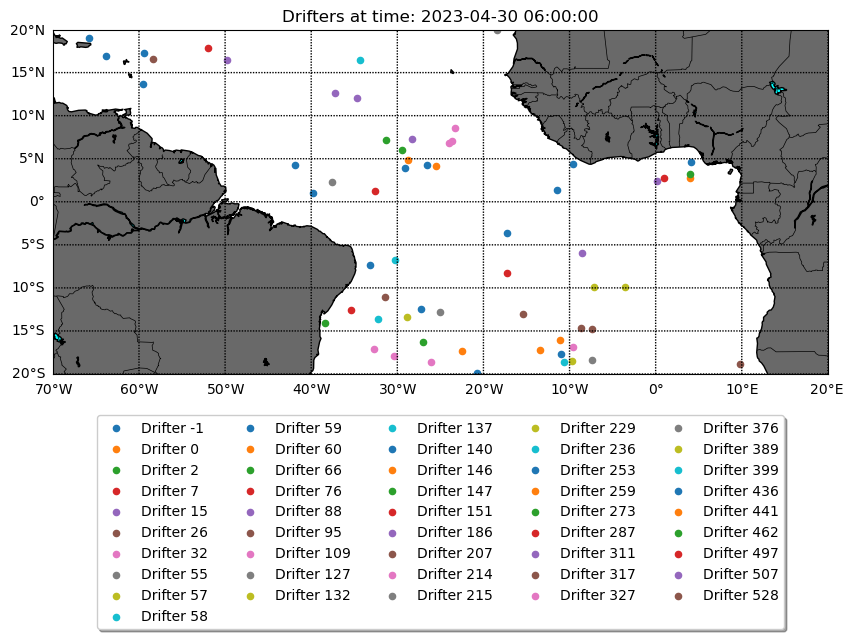

<Figure size 640x480 with 0 Axes>

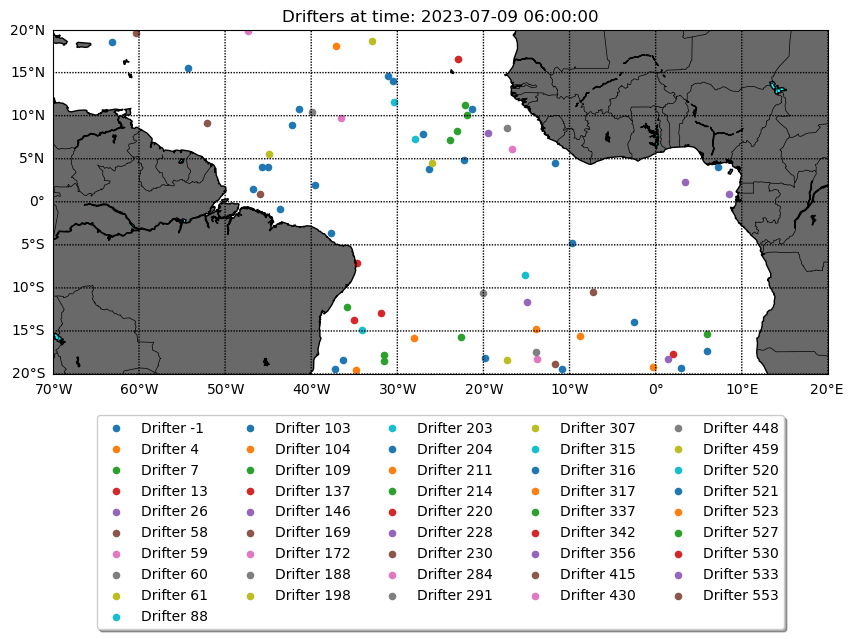

<Figure size 640x480 with 0 Axes>

In [5]:
# Assuming you have a DataFrame named 'df' with columns 'longitude', 'latitude', and 'time'
# Step 1: Detect drifters using DBSCAN
# Not that, DBSCAN is a versatile clustering algorithm suitable for a wide range of applications,
# especially when dealing with spatial data featuring irregular-shaped clusters and noise.

from sklearn.cluster import DBSCAN

epsilon = 0.1
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df['drifter'] = dbscan.fit_predict(df[['Longitude', 'Latitude']])

# Step 2: Define a function to visualize drifters at a specific time
def visualize_drifters_at_time(df, time_value):
    fig = plt.figure(figsize=(10, 8))
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-20,
                urcrnrlat=20,
                llcrnrlon=-70,
                urcrnrlon=20)
    m.drawcoastlines()
    m.drawcountries()
    #m.drawrivers()
    m.fillcontinents(color='dimgray', lake_color='aqua')
    m.drawparallels(np.arange(-90., 91., 5.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0, 0, 0, 1], fontsize=10)
    
    for drifter_id, drifter_df in df.groupby('drifter'):
        plt.scatter(drifter_df['Longitude'], drifter_df['Latitude'], label=f'Drifter {drifter_id}', s=20)
    
    plt.title(f'Drifters at time: {time_value}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
    plt.show()

# Step 3: Visualize drifters at a specific time
specific_time = '2023-04-30 06:00:00'  # Change this to your desired time   
df_at_time = df[df['time'] == specific_time]
visualize_drifters_at_time(df_at_time, specific_time)
plt.savefig('fig4 mode.png')

# Assuming you have a DataFrame named 'df' with columns 'longitude', 'latitude', and 'time'
# Step 1: Detect drifters using DBSCAN
from sklearn.cluster import DBSCAN

epsilon = 0.1
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df['drifter'] = dbscan.fit_predict(df[['Longitude', 'Latitude']])

# Step 2: Define a function to visualize drifters at a specific time
def visualize_drifters_at_time(df, time_value):
    fig = plt.figure(figsize=(10, 8))
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-20,
                urcrnrlat=20,
                llcrnrlon=-70,
                urcrnrlon=20)
    m.drawcoastlines()
    m.drawcountries()
    #m.drawrivers()
    m.fillcontinents(color='dimgray', lake_color='aqua')
    m.drawparallels(np.arange(-90., 91., 5.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0, 0, 0, 1], fontsize=10)
    
    for drifter_id, drifter_df in df.groupby('drifter'):
        plt.scatter(drifter_df['Longitude'], drifter_df['Latitude'], label=f'Drifter {drifter_id}', s=20)
    
    plt.title(f'Drifters at time: {time_value}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
    plt.show()

# Step 3: Visualize drifters at a specific time
specific_time = '2023-07-09 06:00:00'  # Change this to your desired time   
df_at_time = df[df['time'] == specific_time]
visualize_drifters_at_time(df_at_time, specific_time)
plt.savefig('fig5 mode.png')

#### 2. Inertial oscillation

## Visualization of drifter trajectories

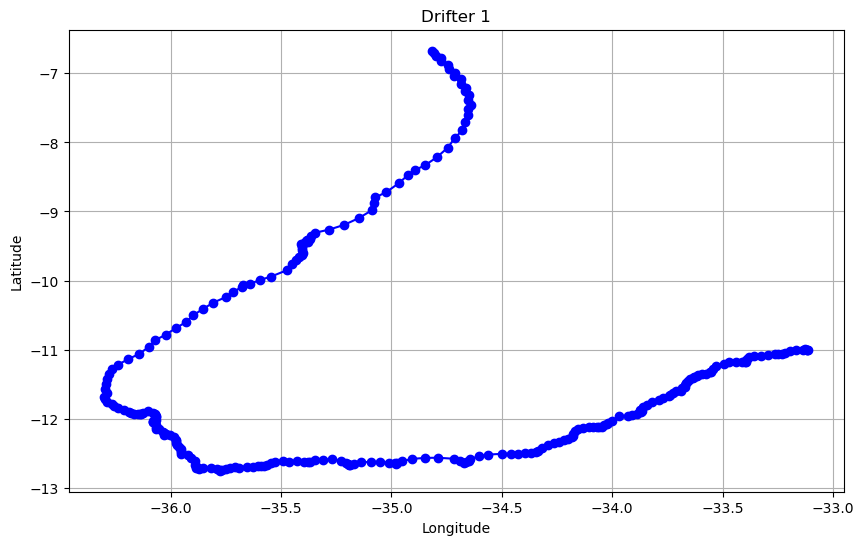

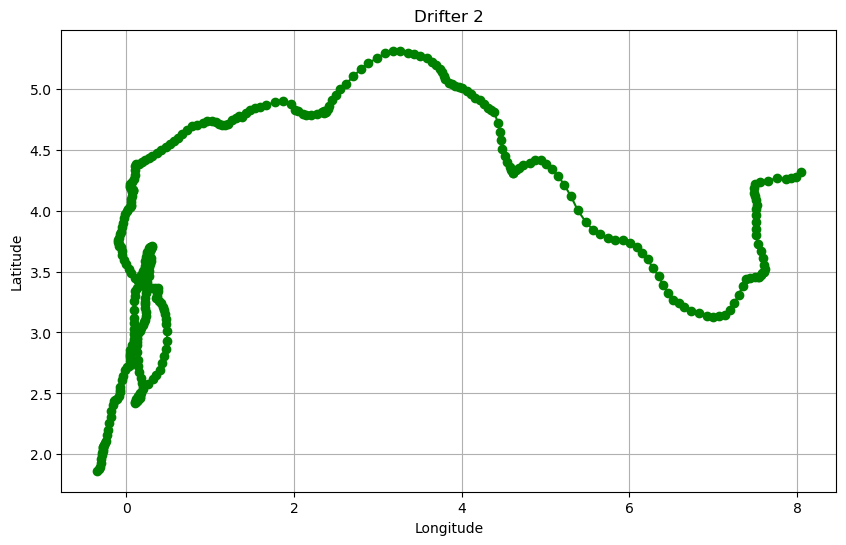

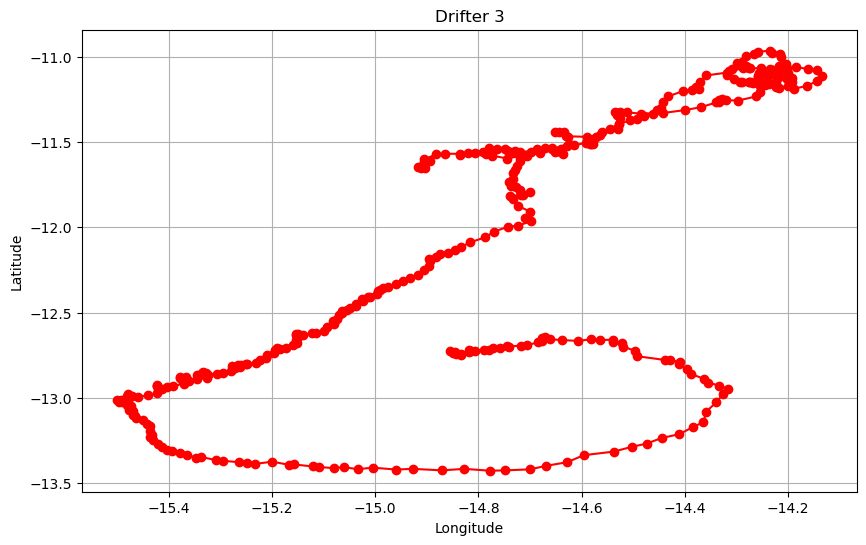

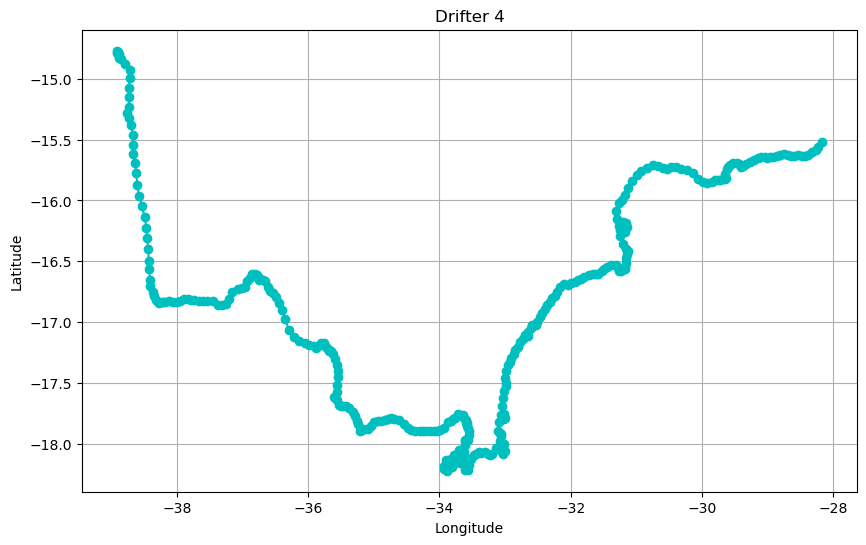

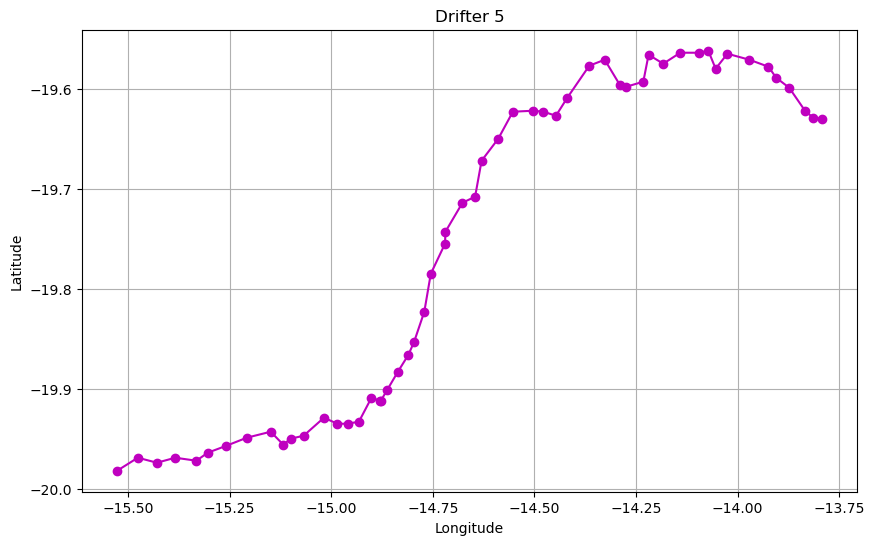

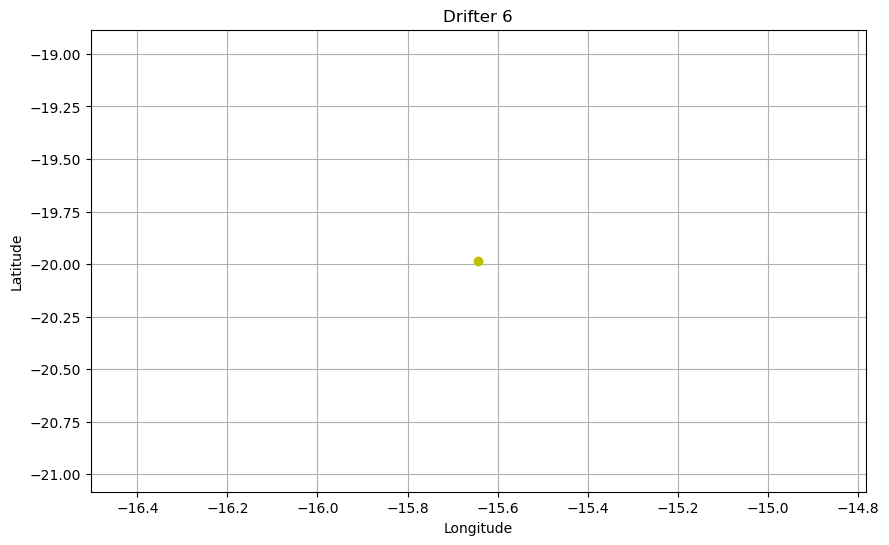

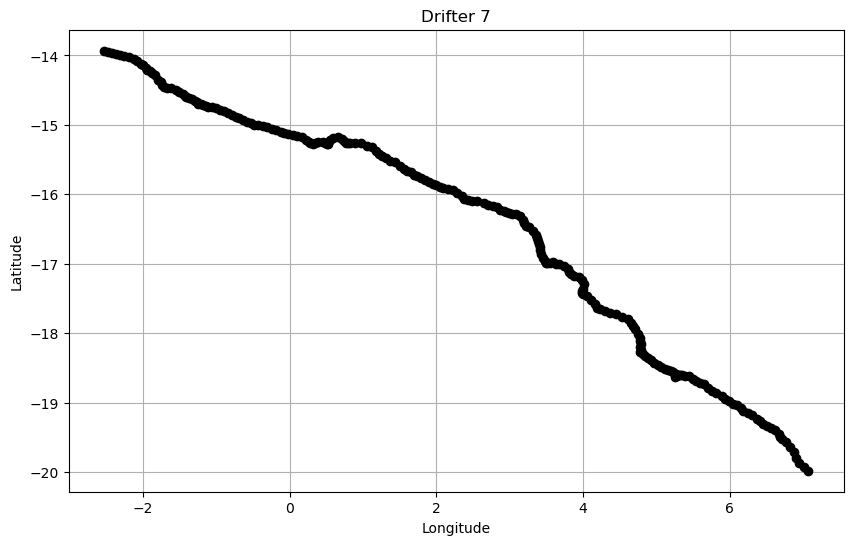

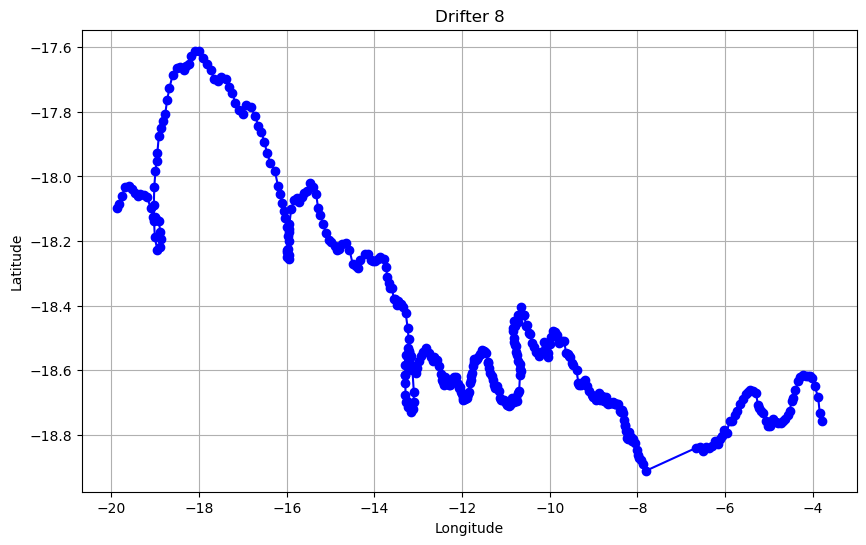

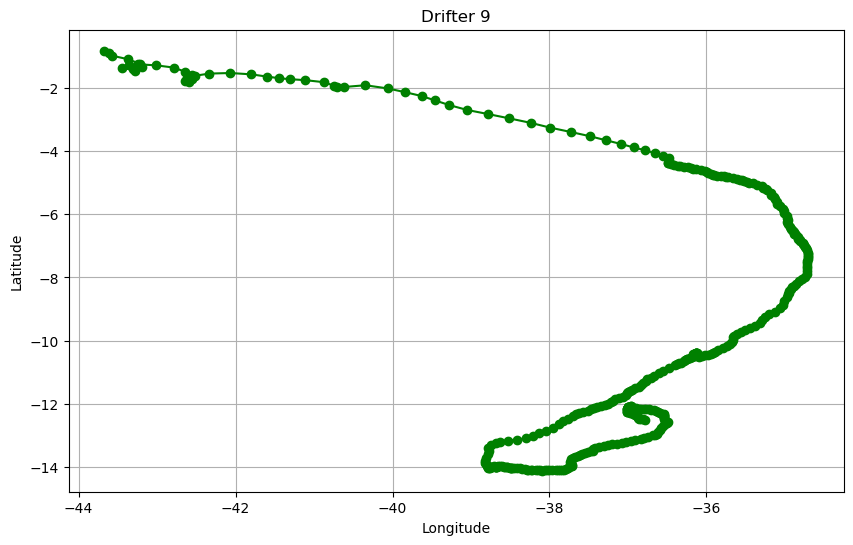

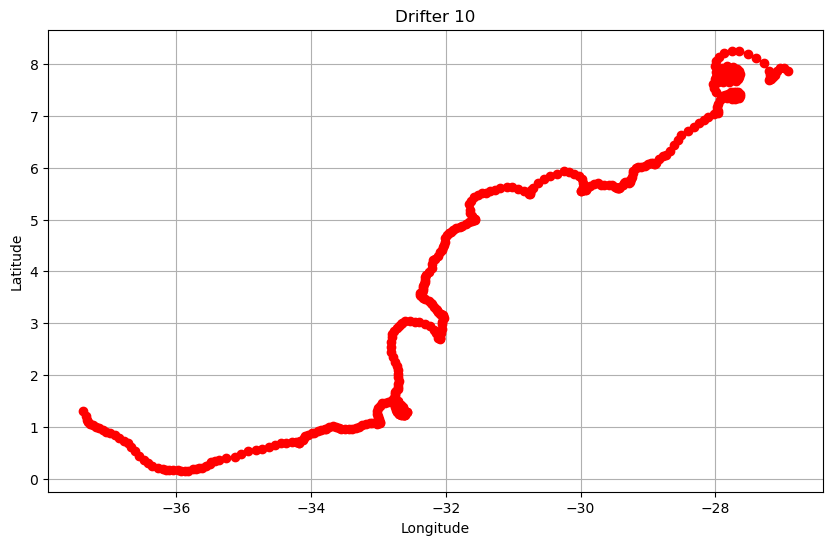

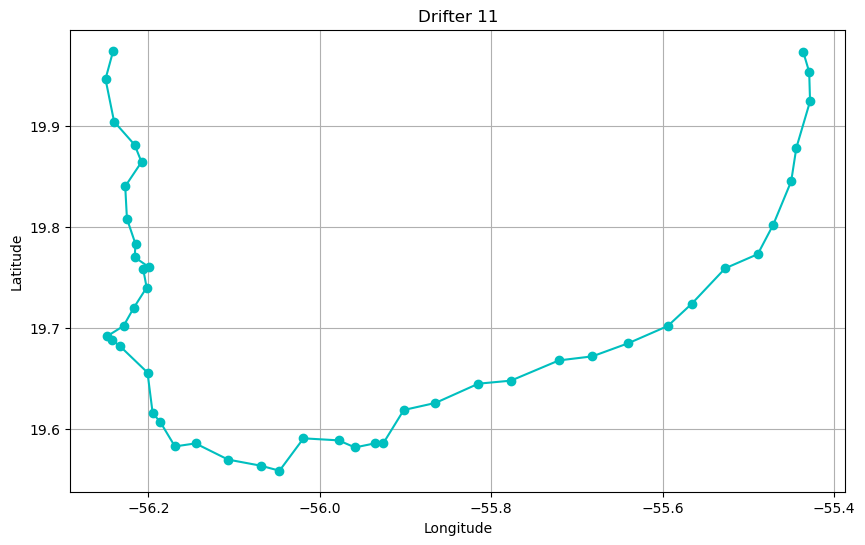

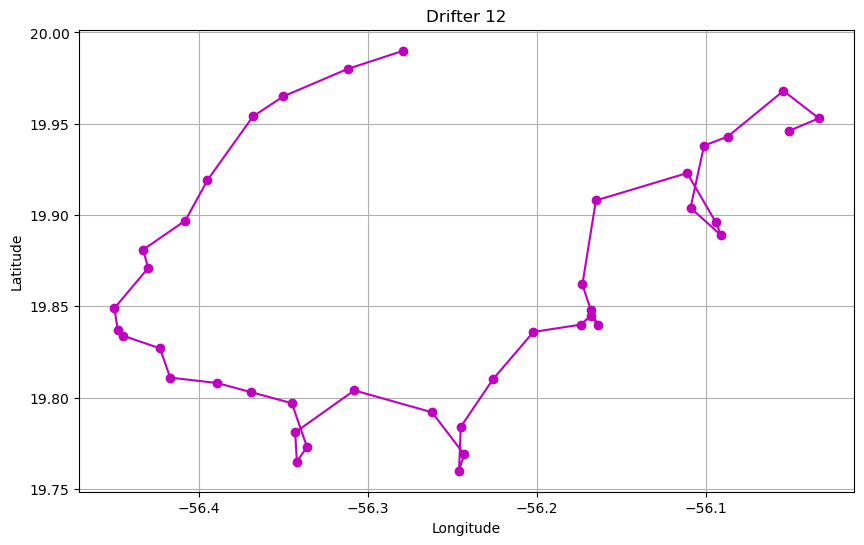

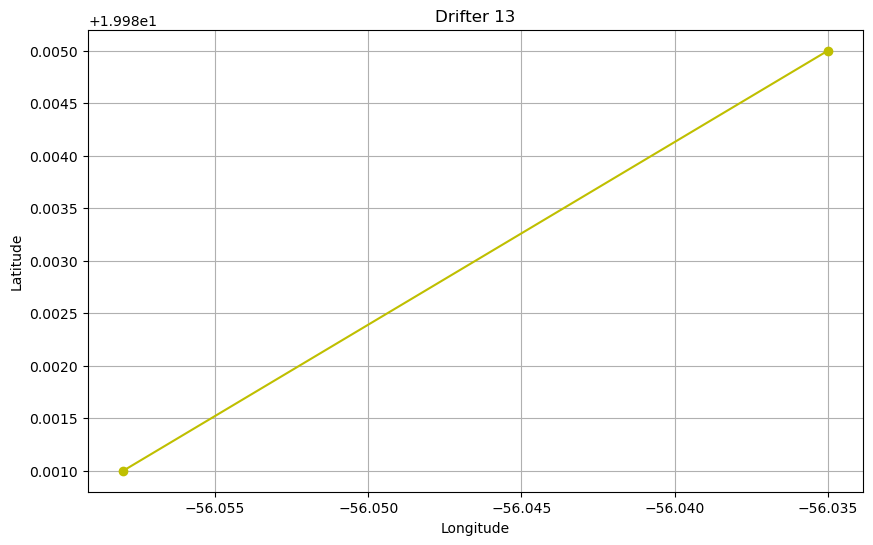

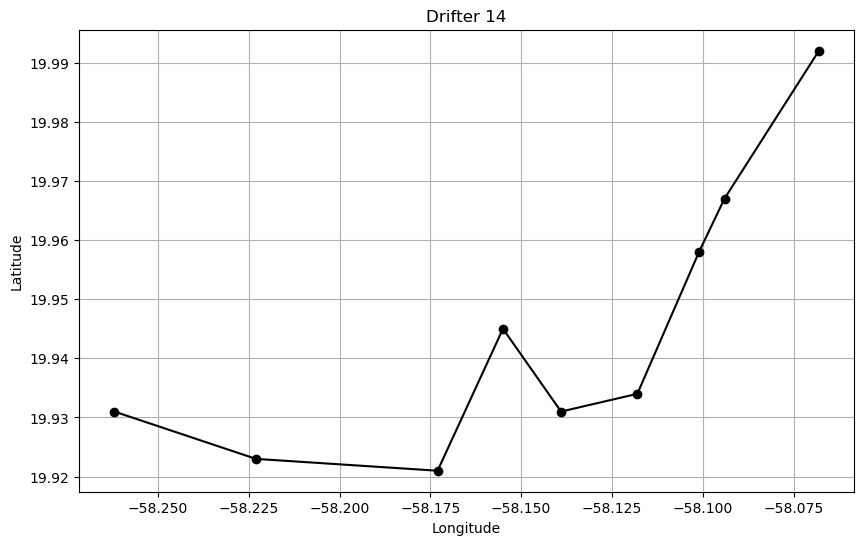

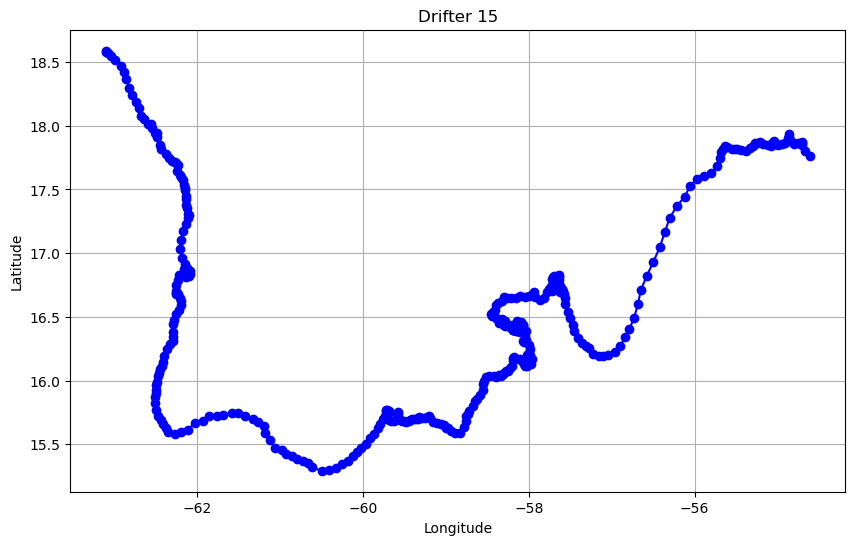

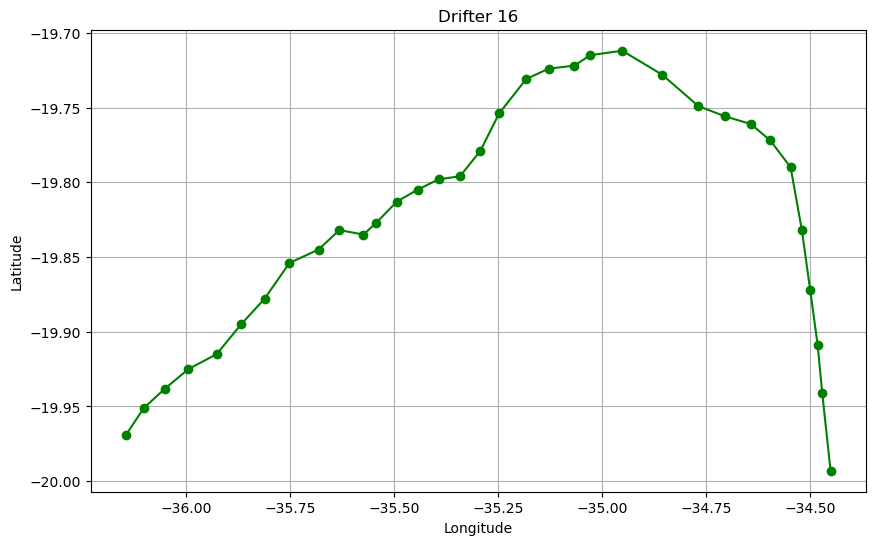

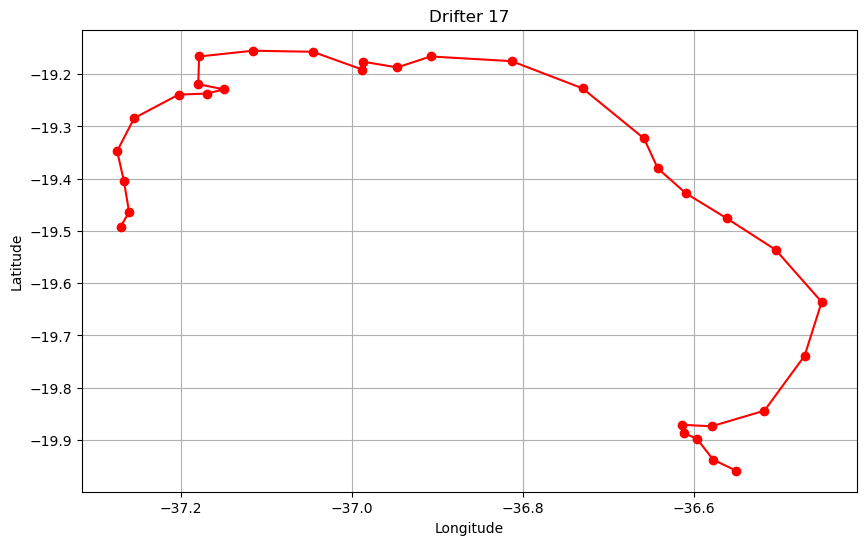

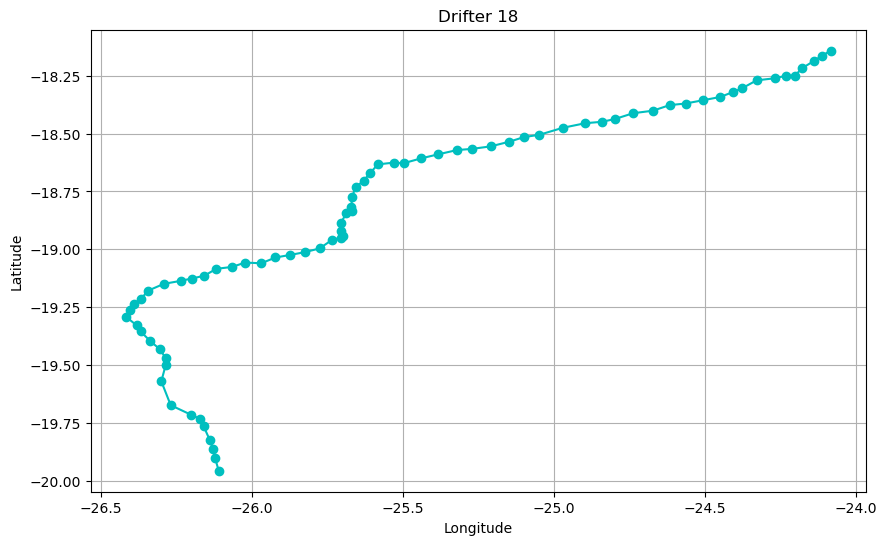

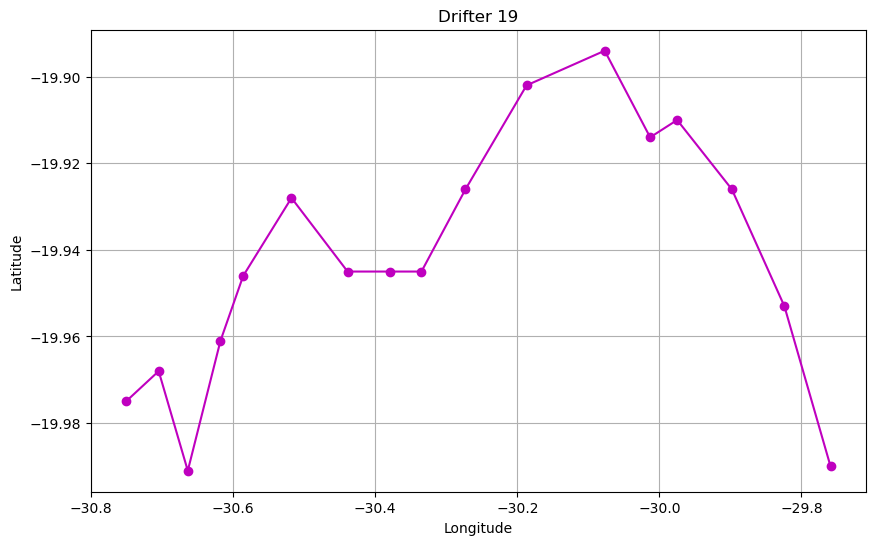

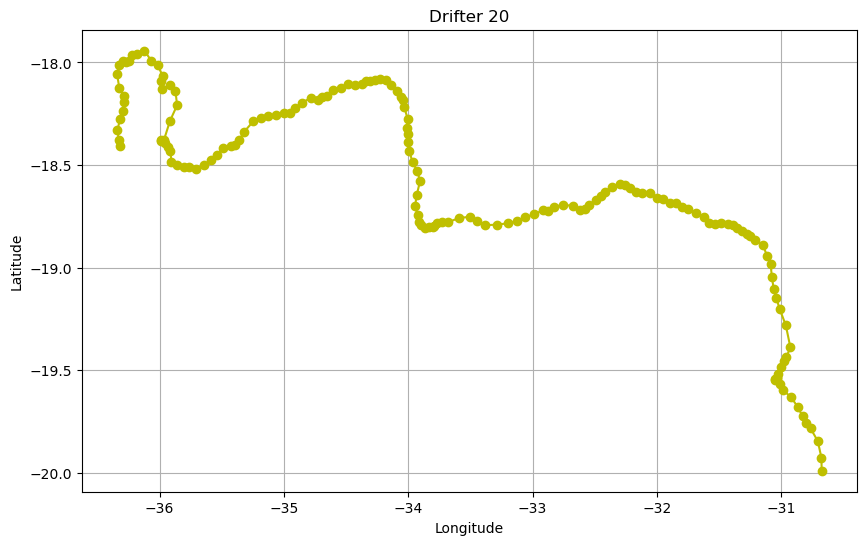

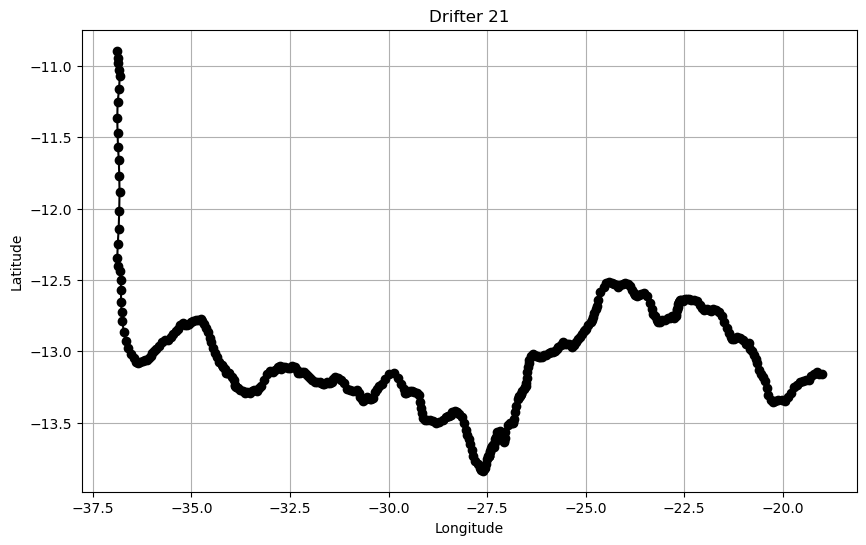

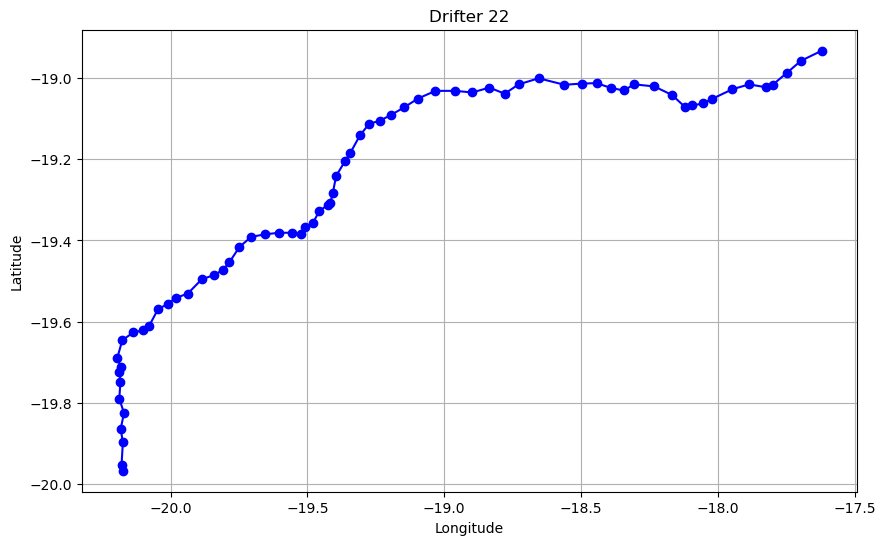

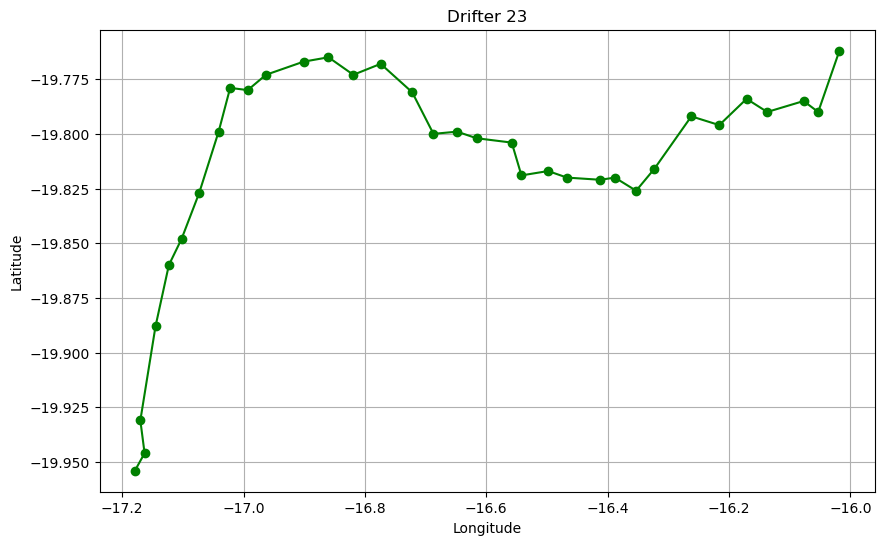

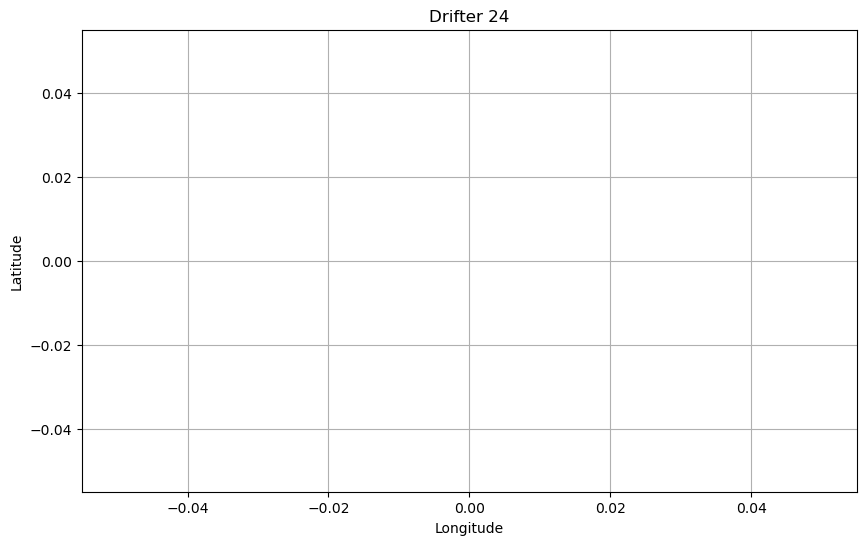

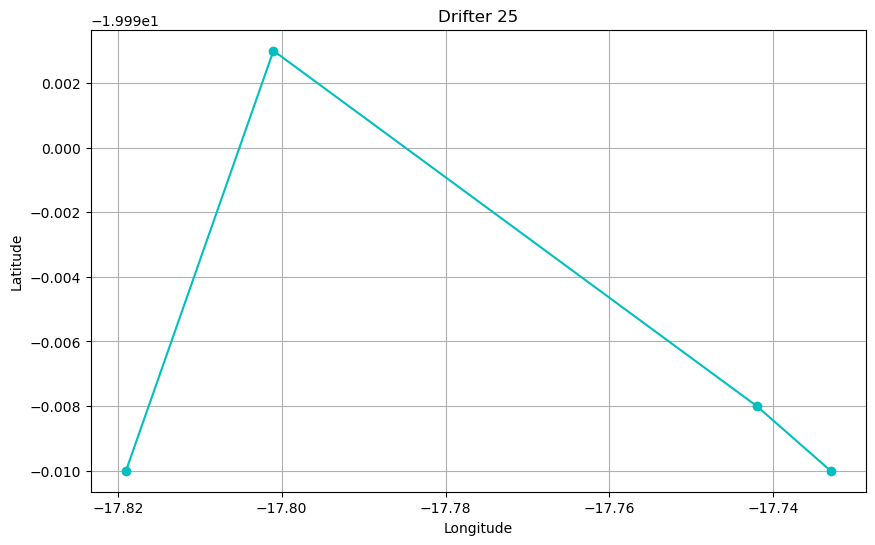

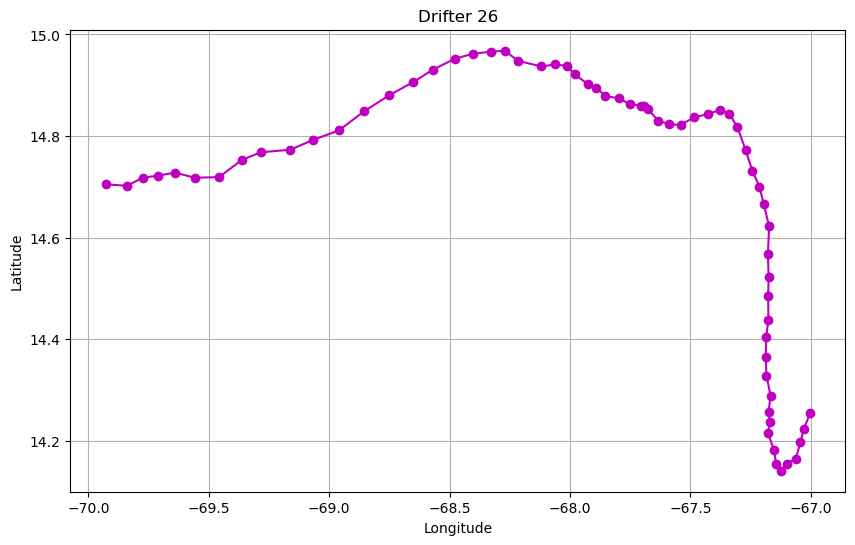

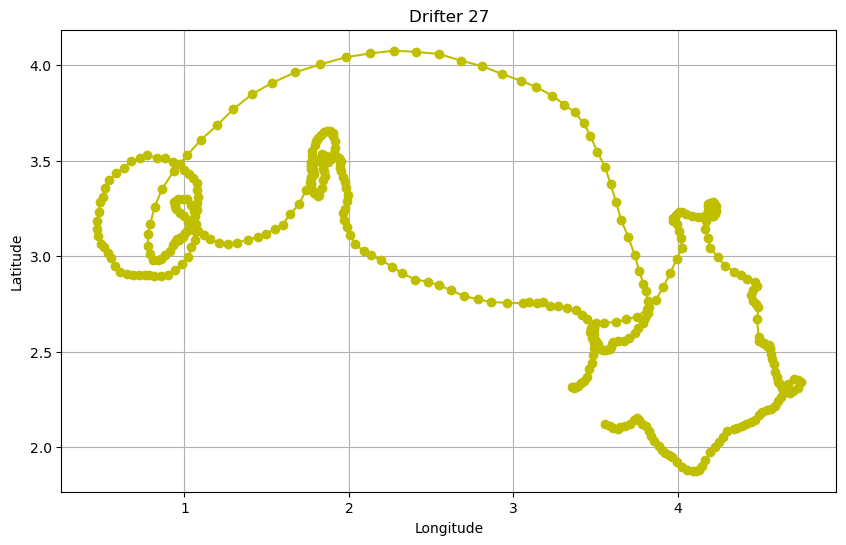

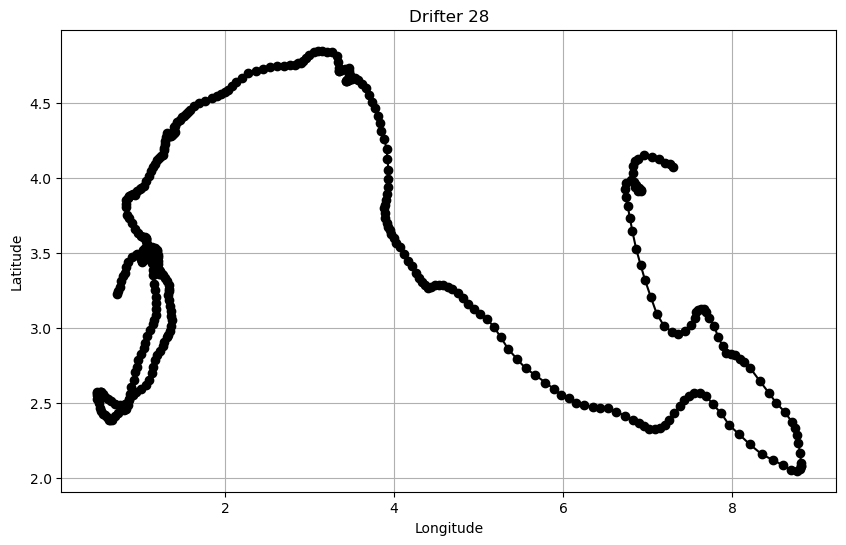

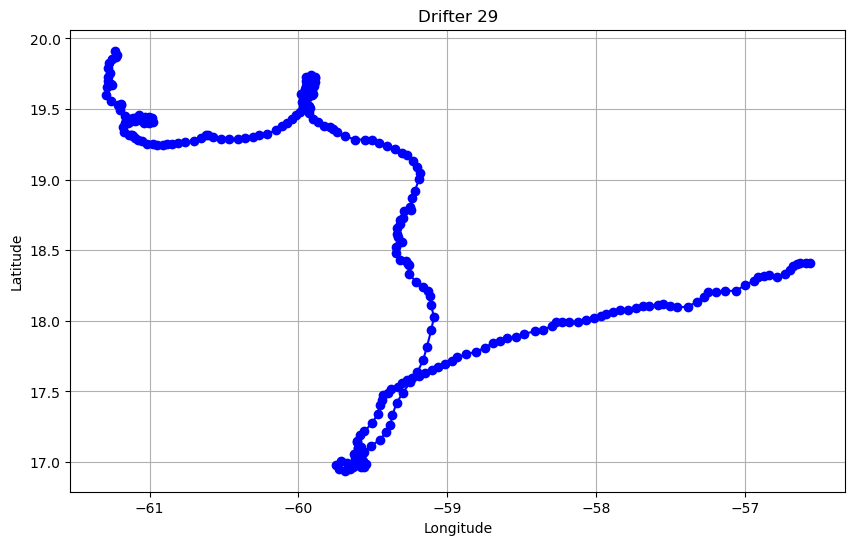

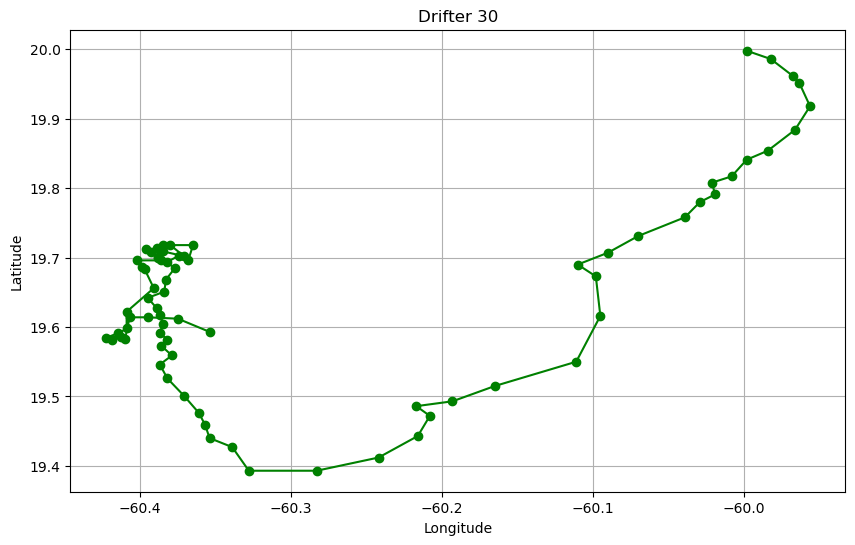

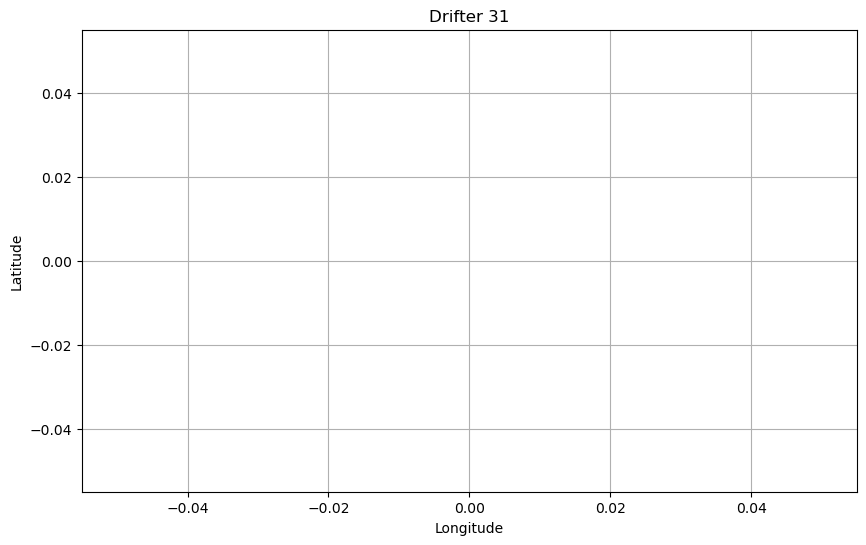

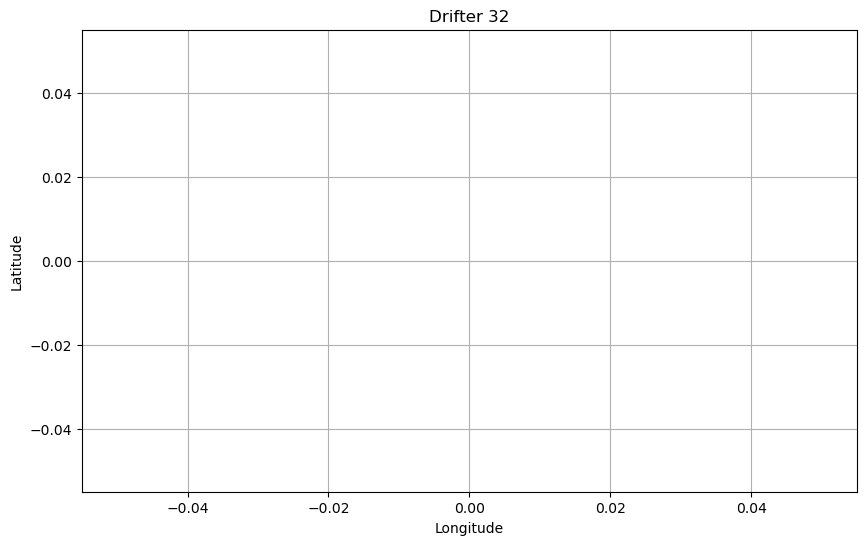

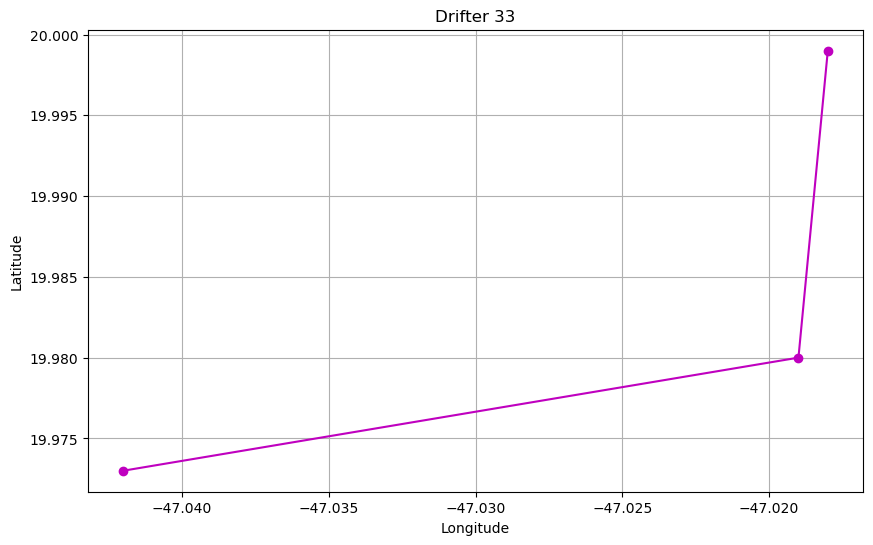

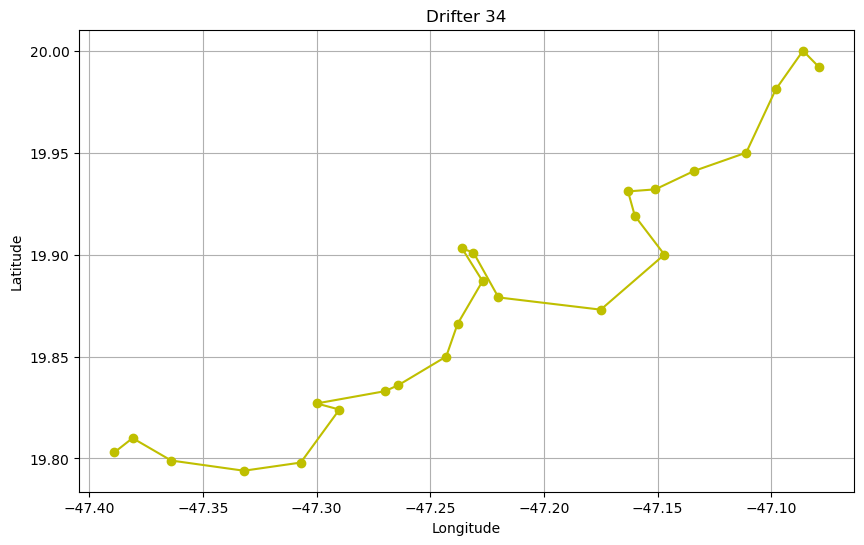

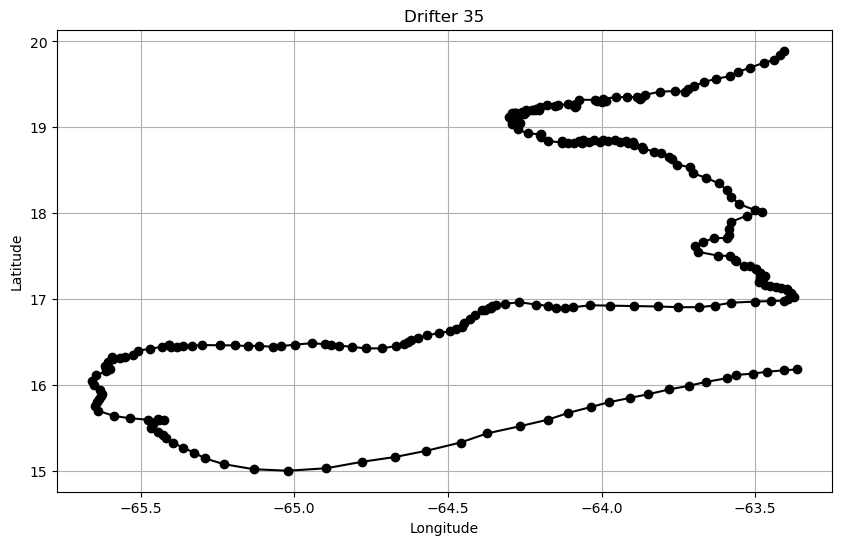

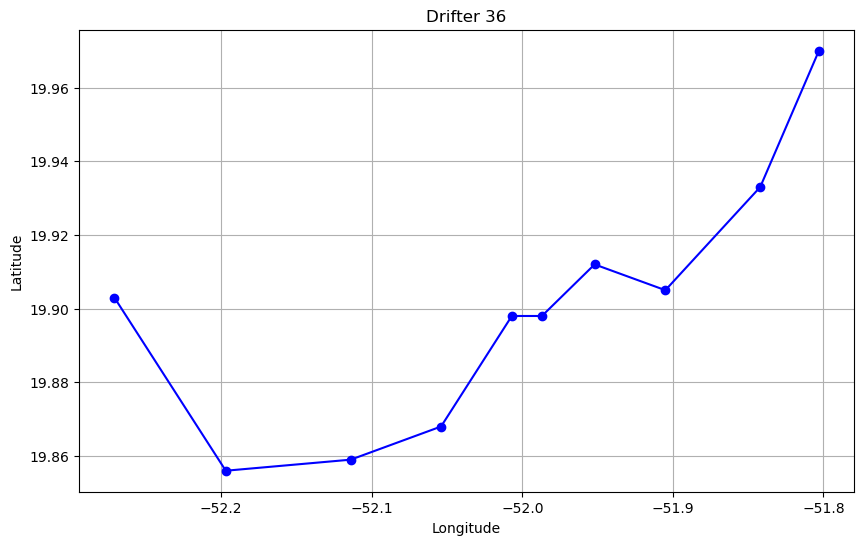

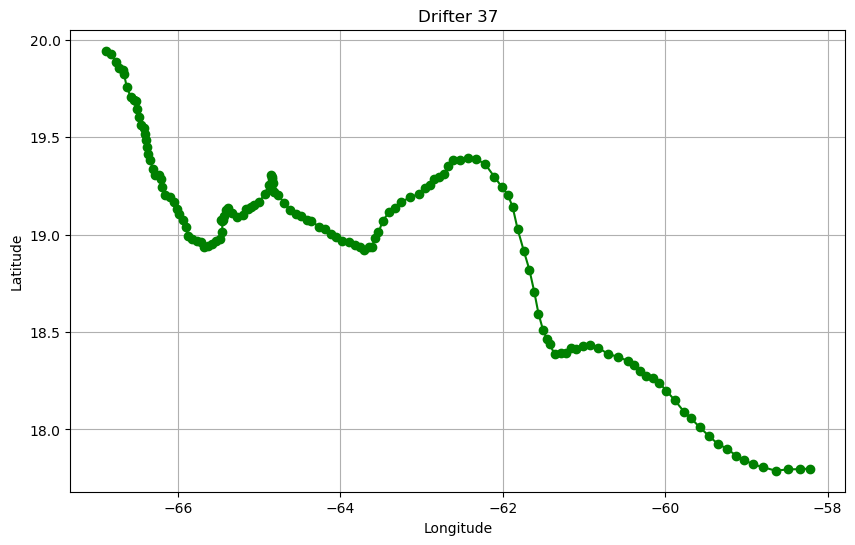

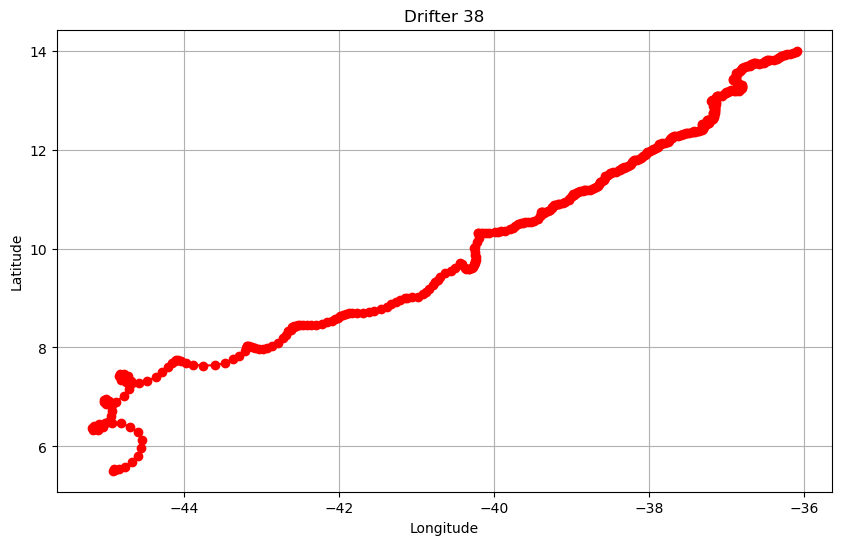

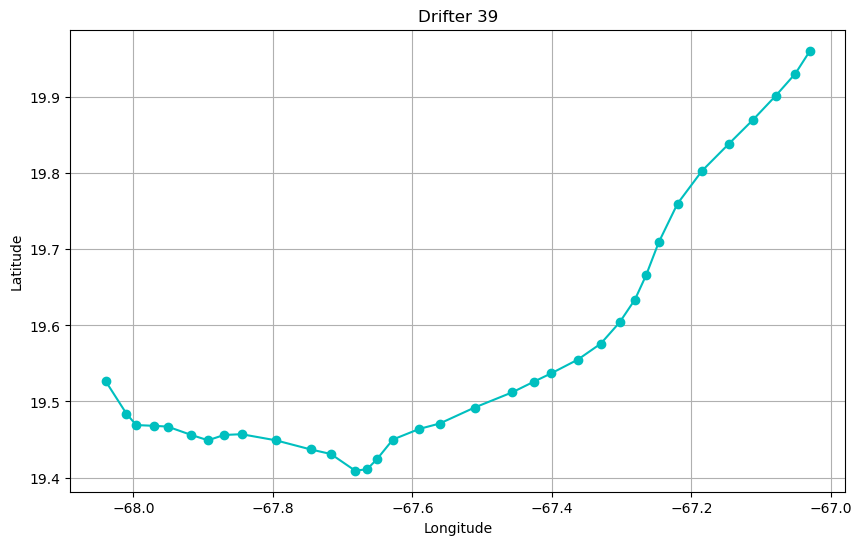

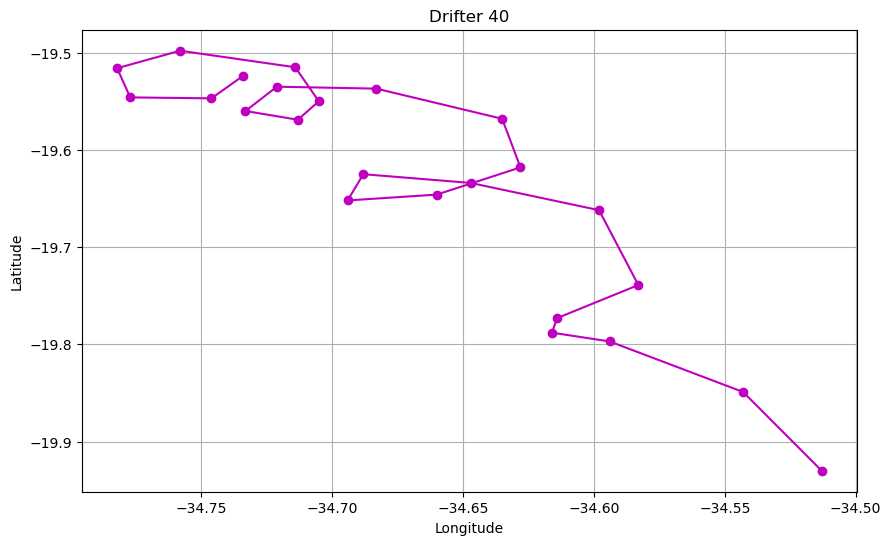

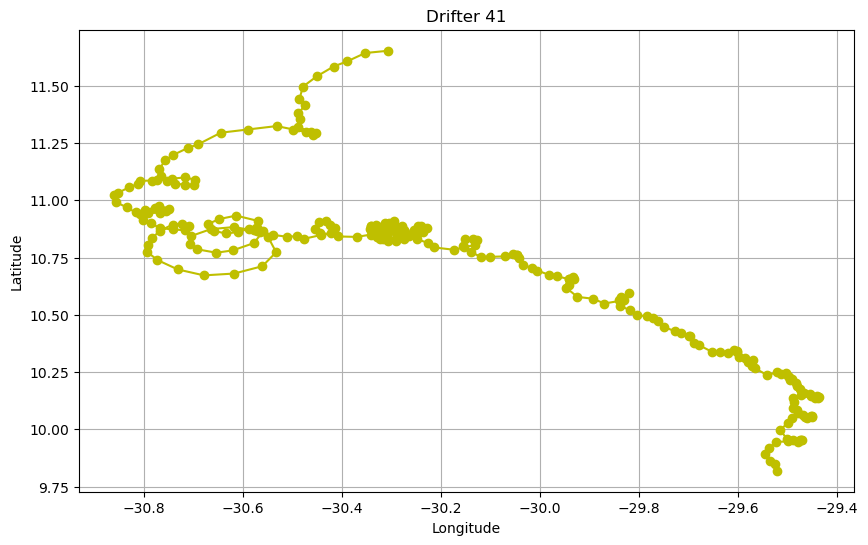

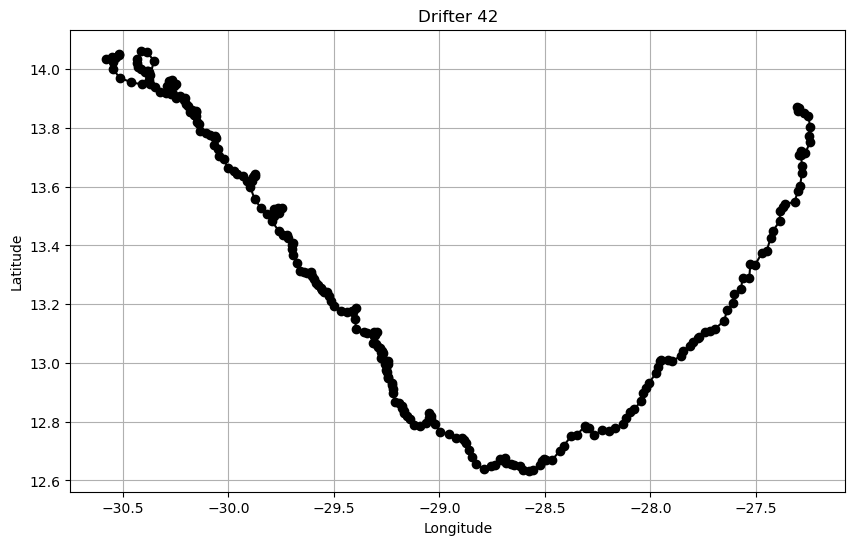

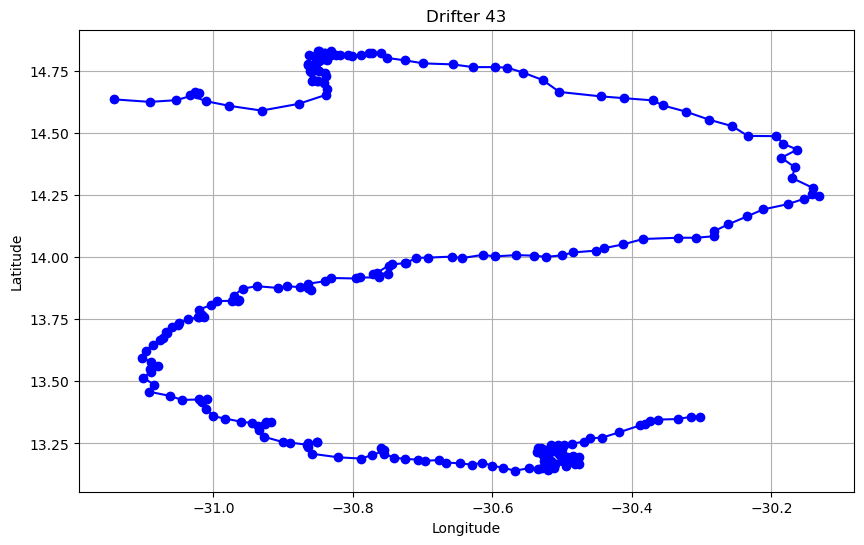

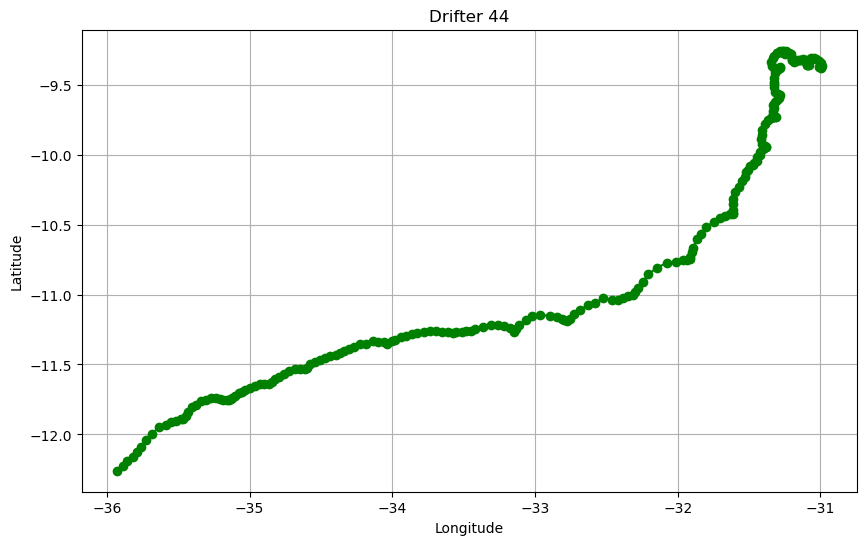

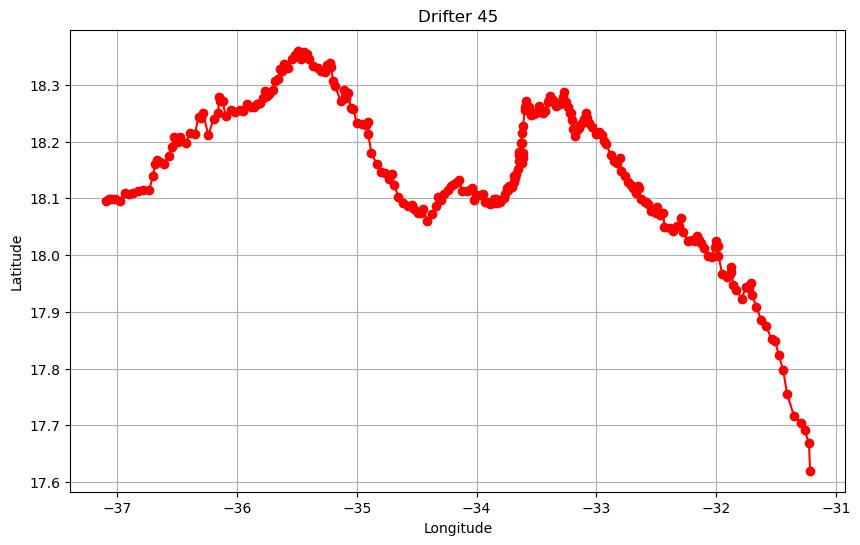

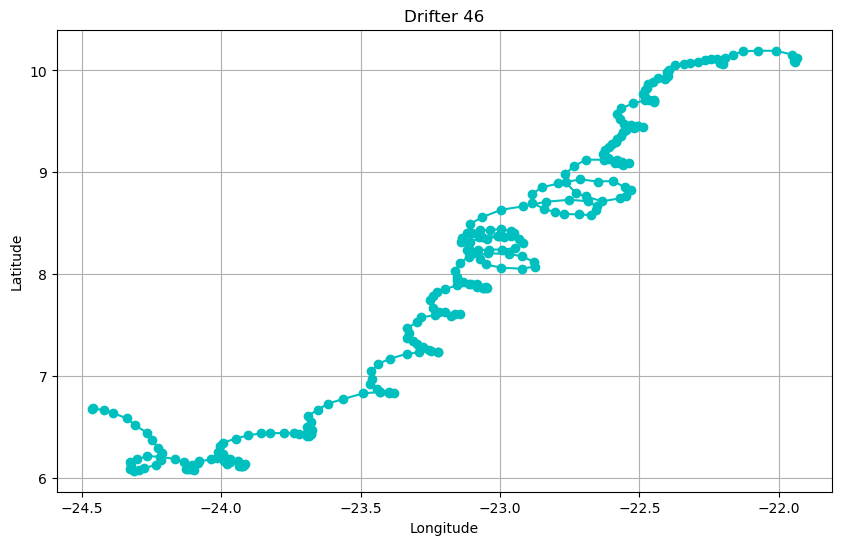

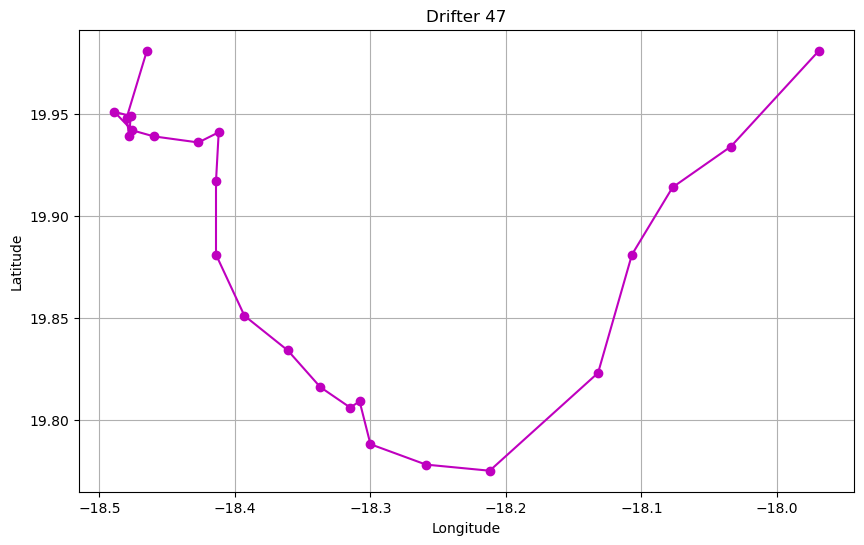

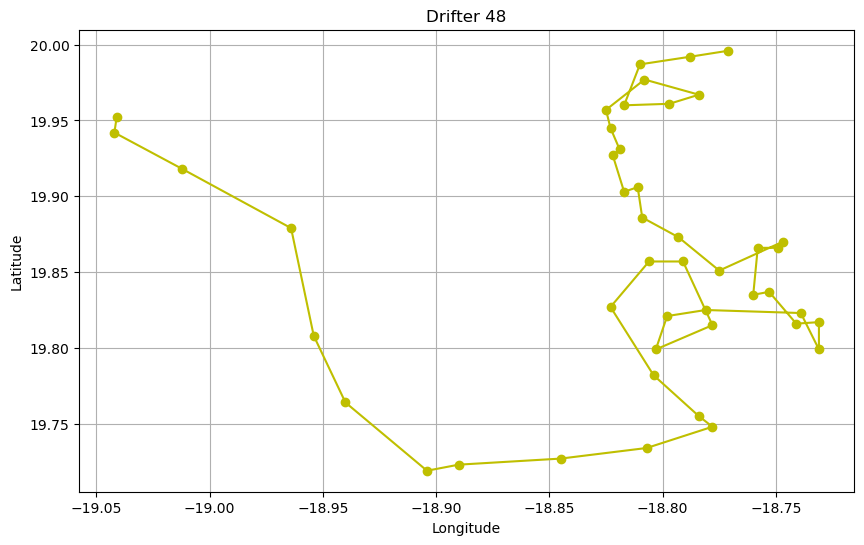

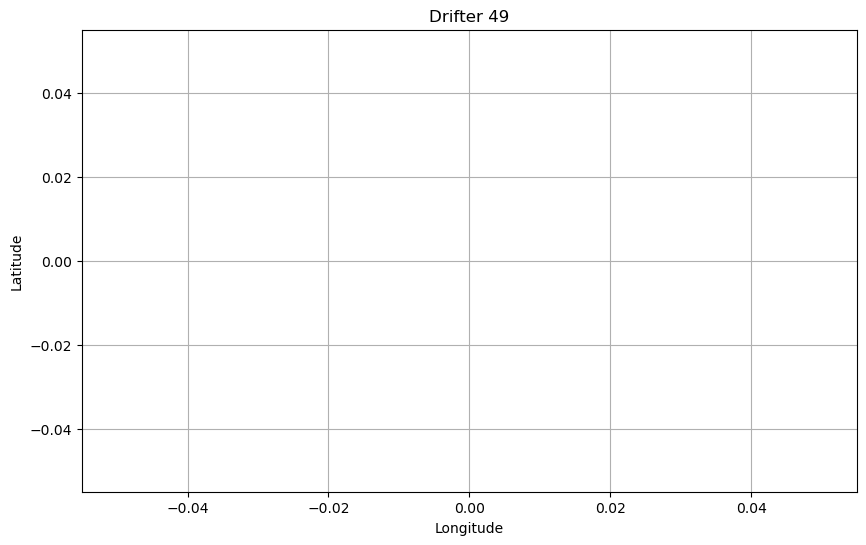

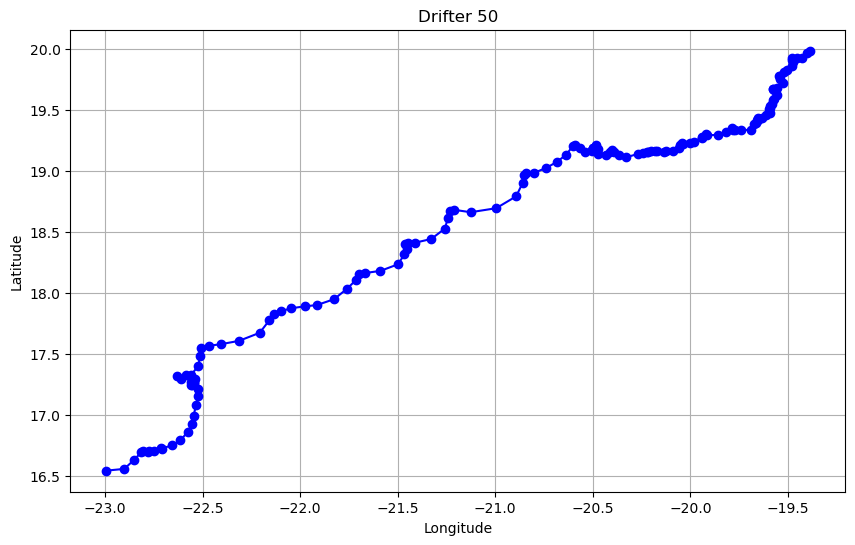

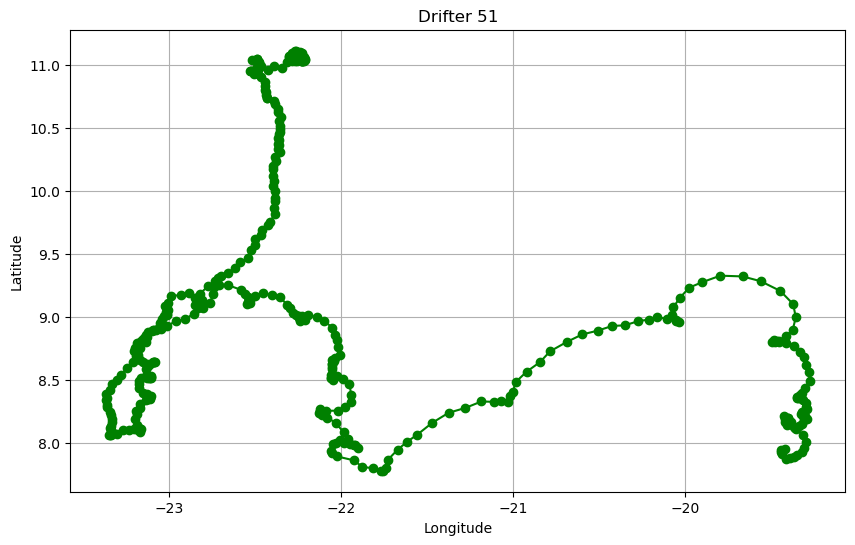

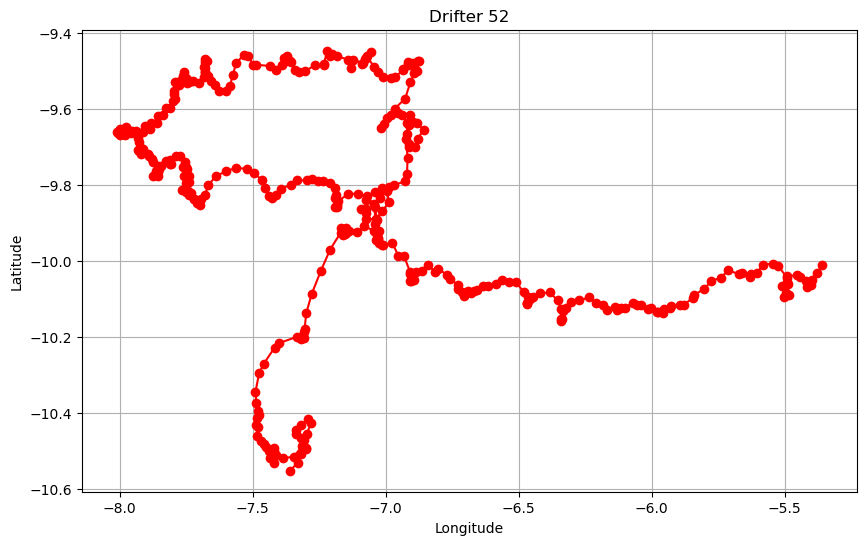

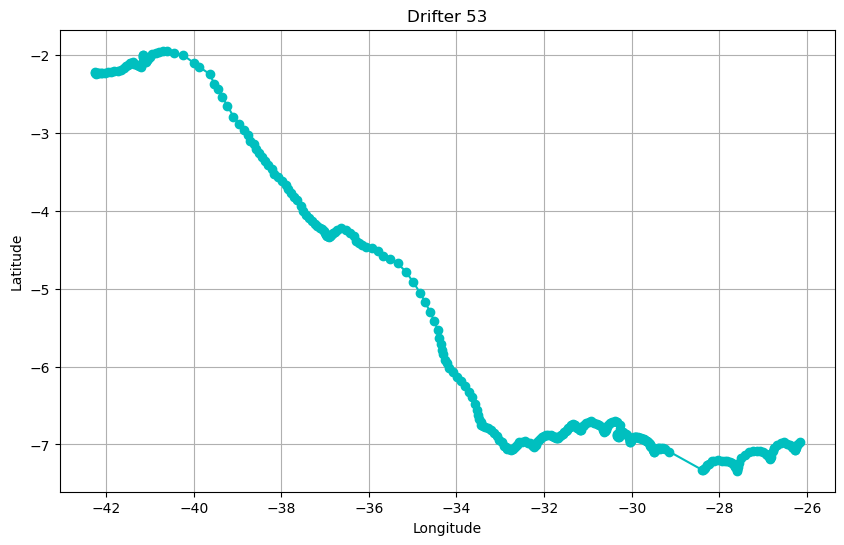

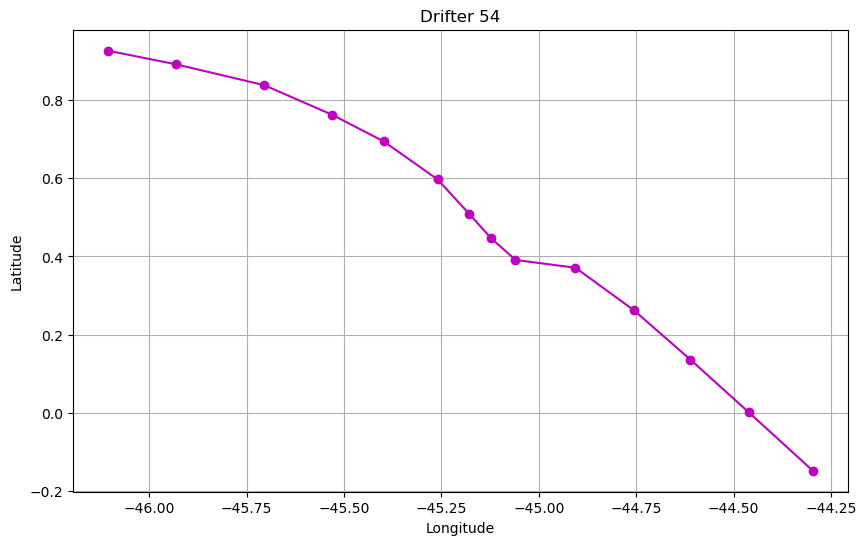

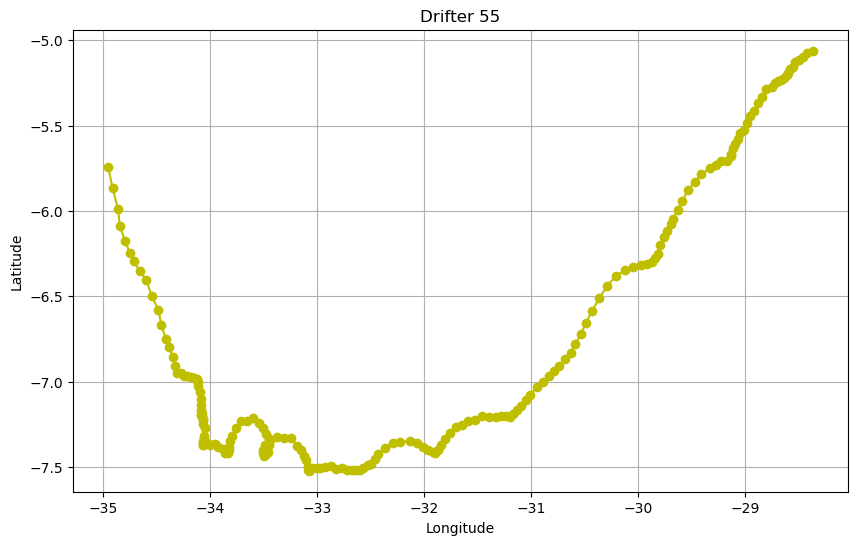

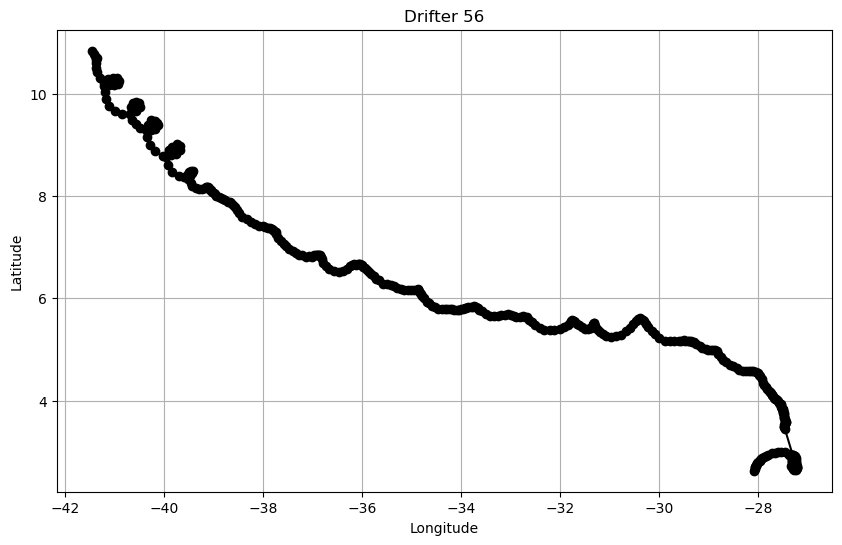

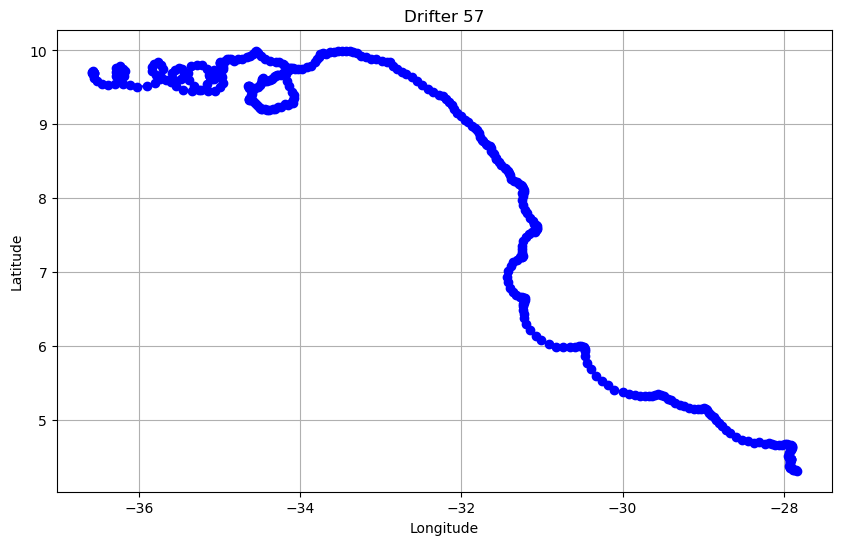

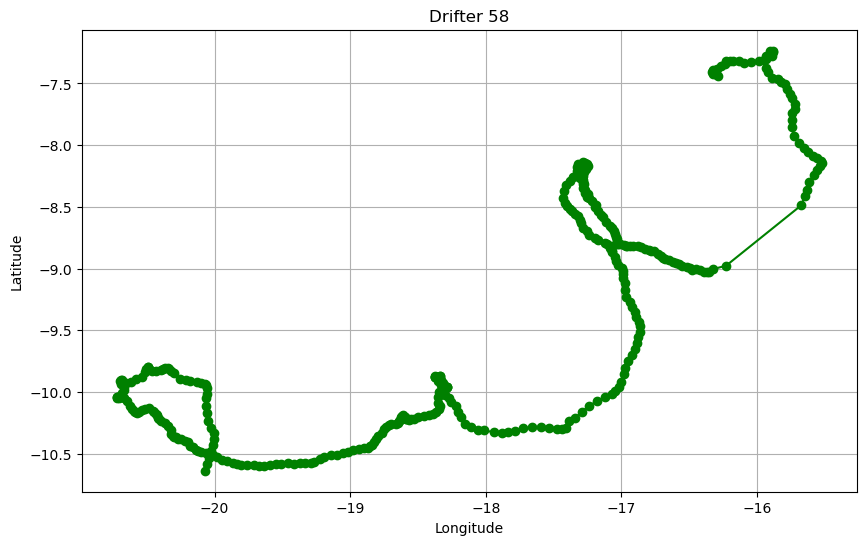

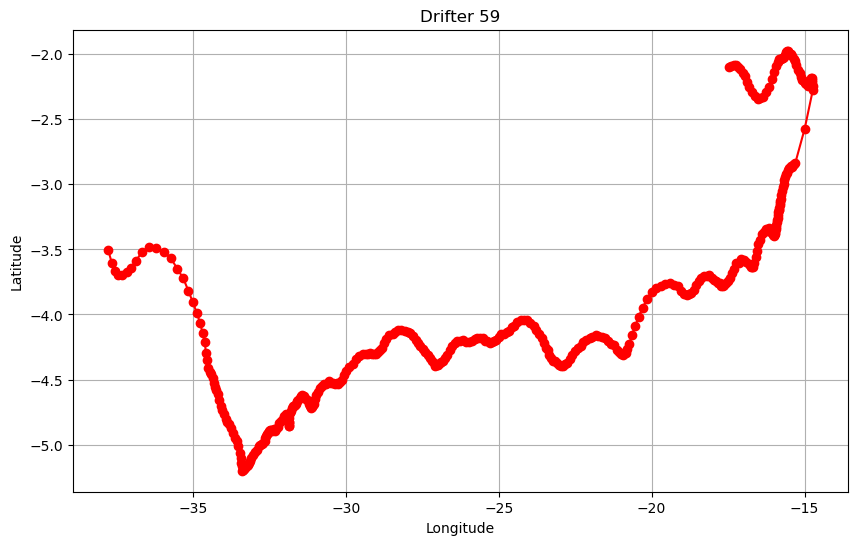

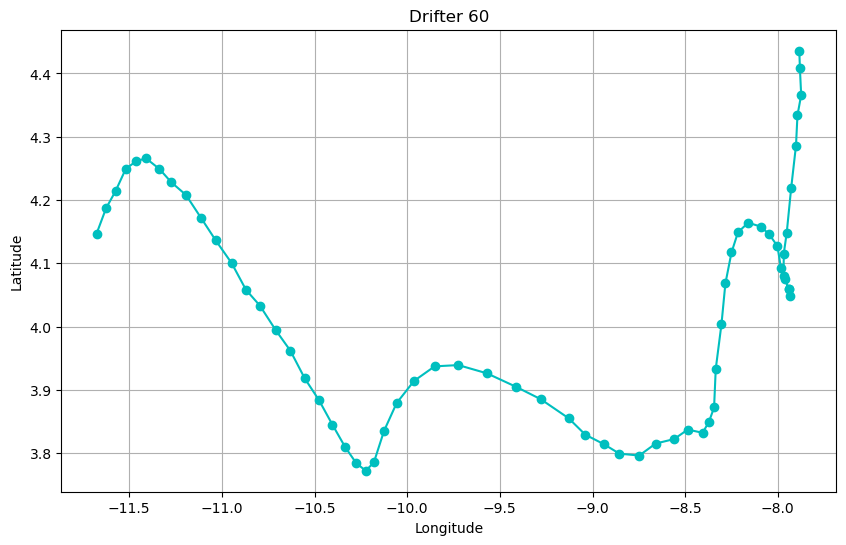

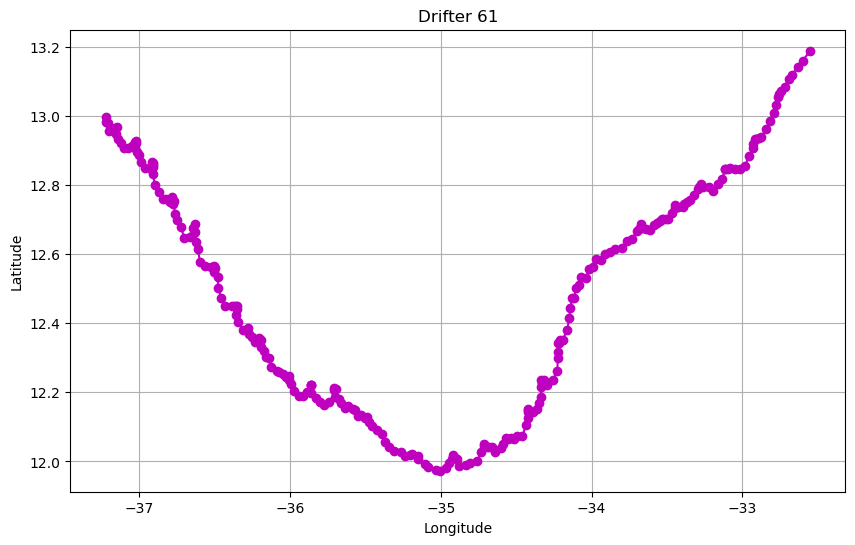

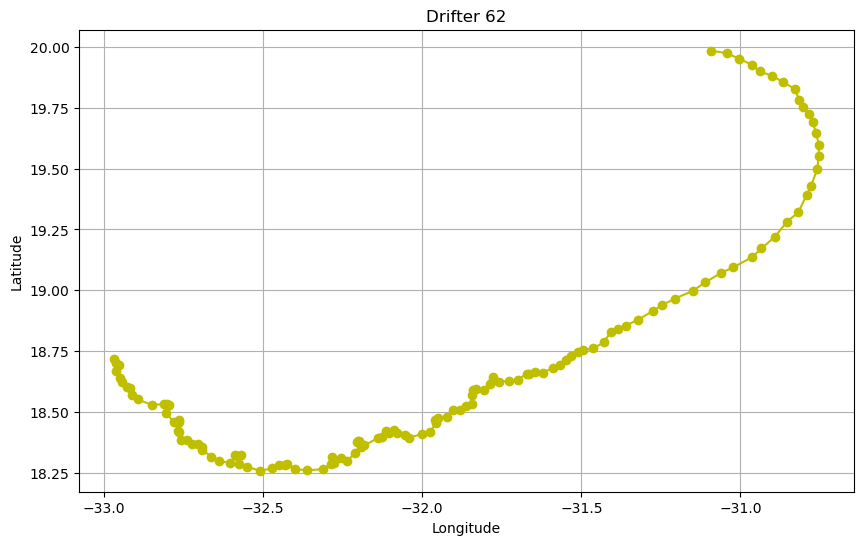

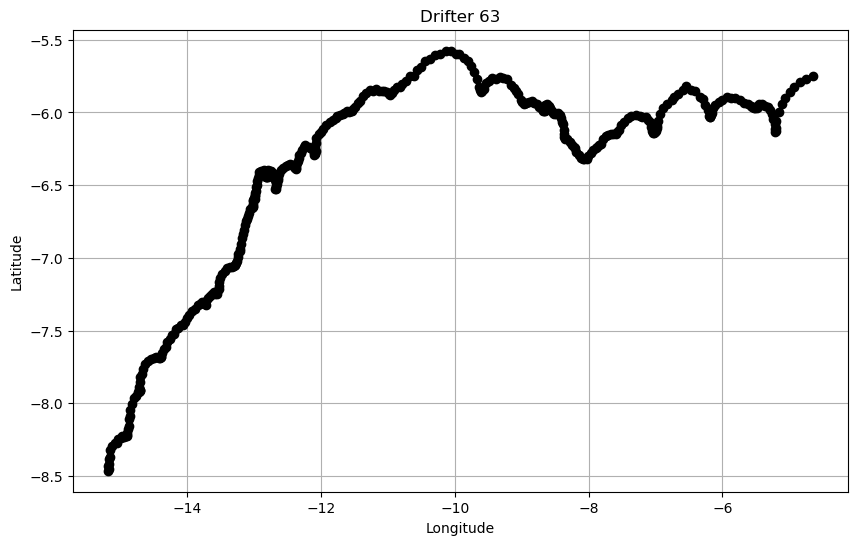

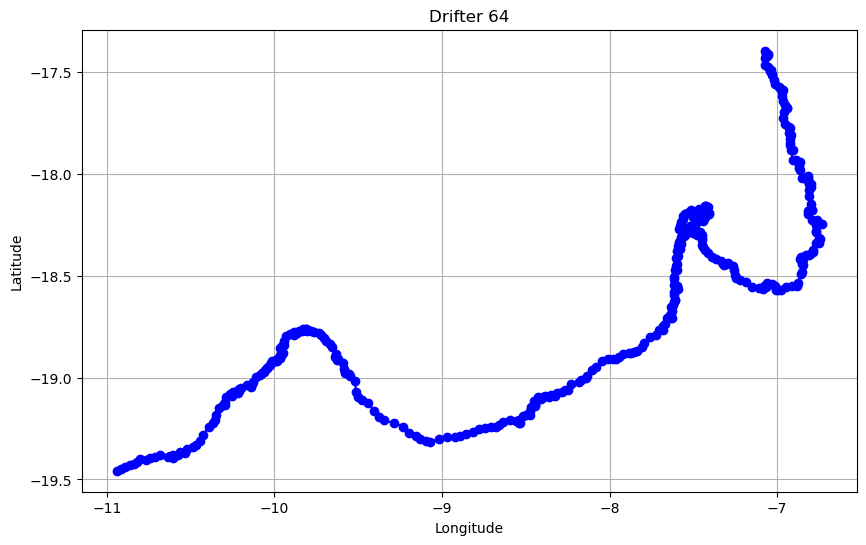

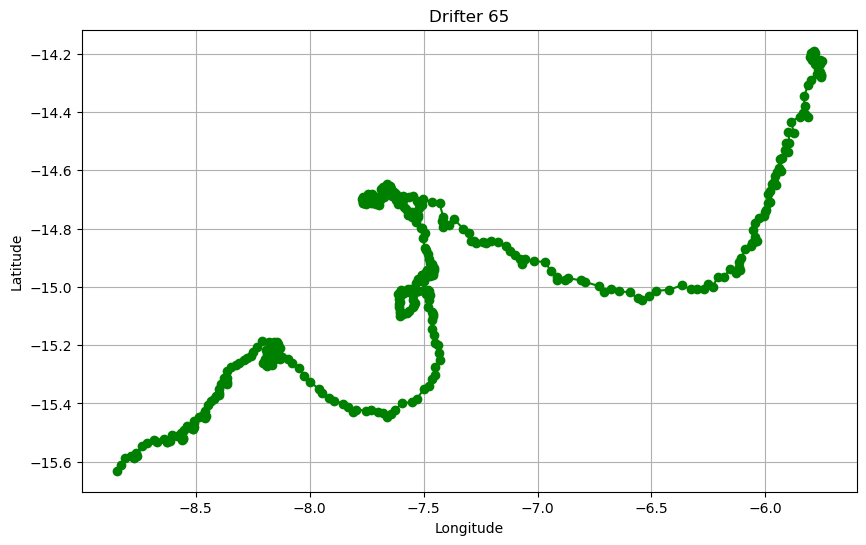

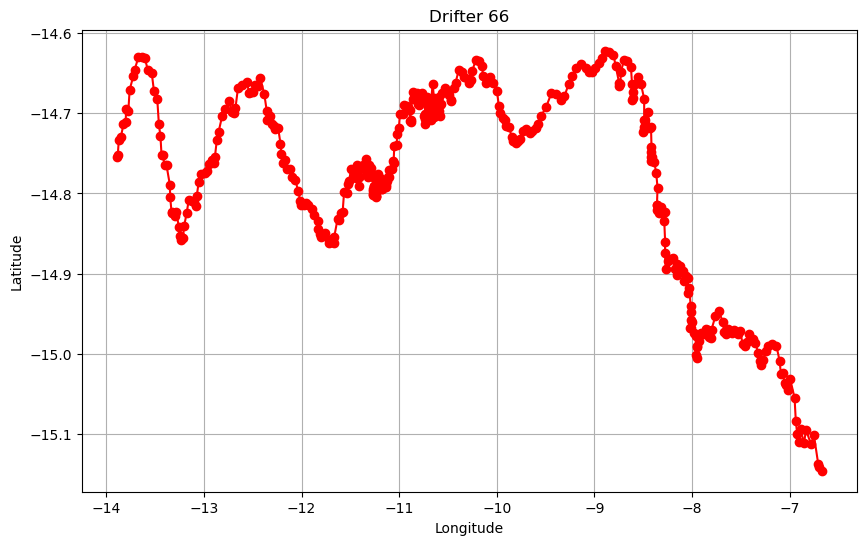

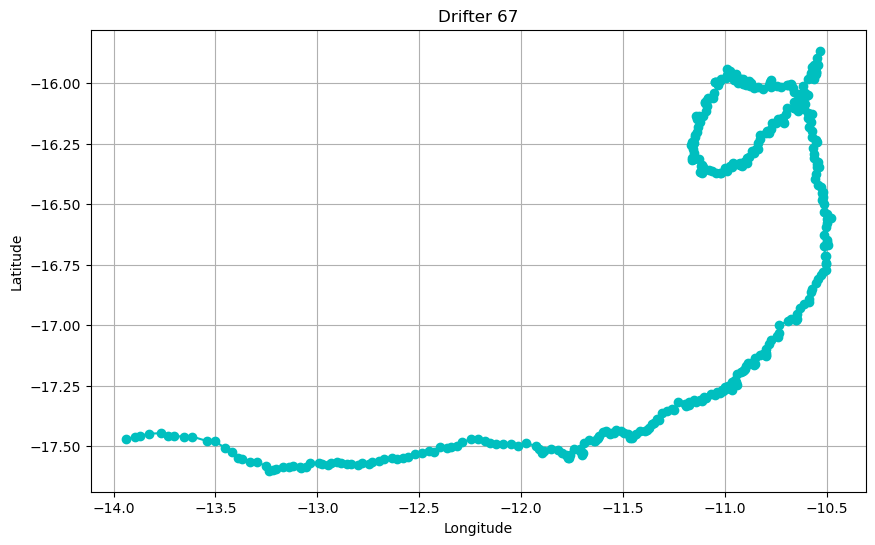

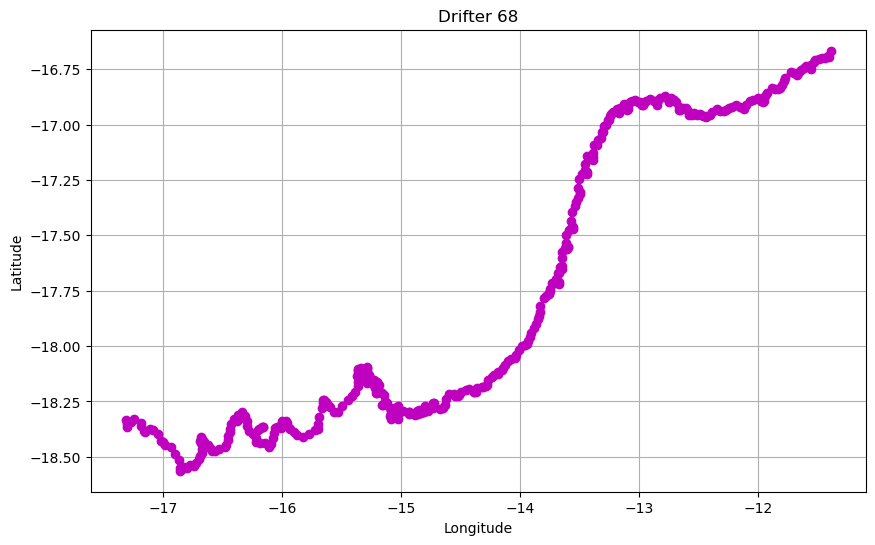

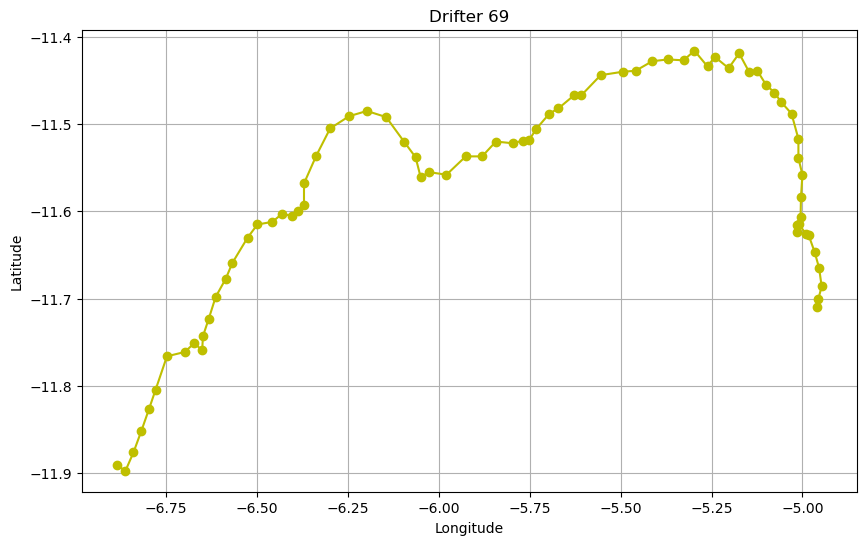

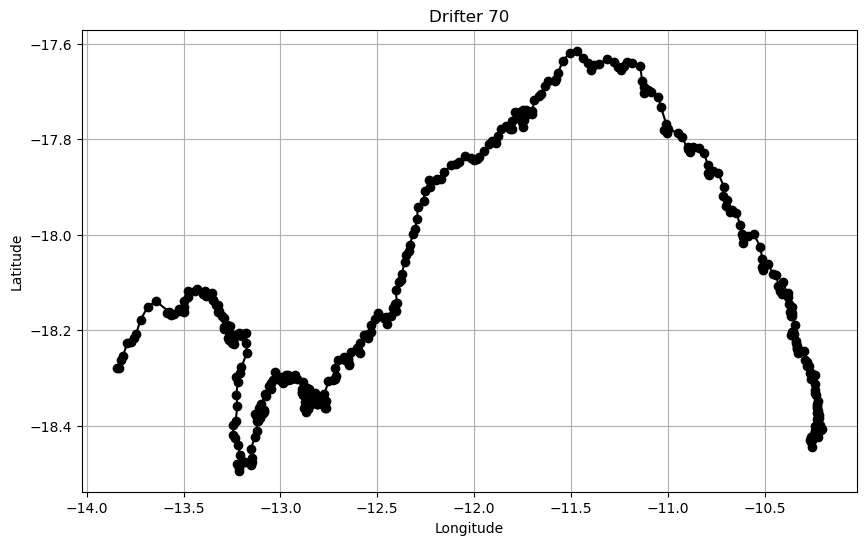

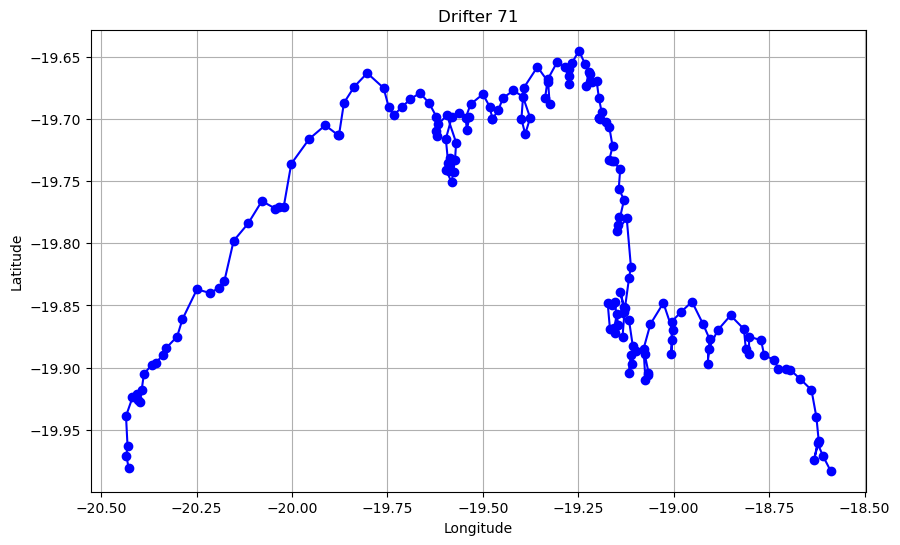

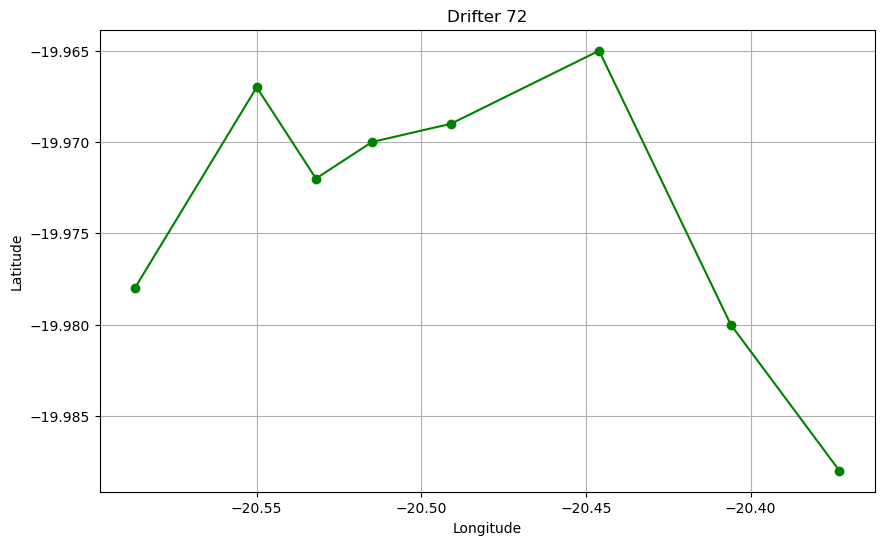

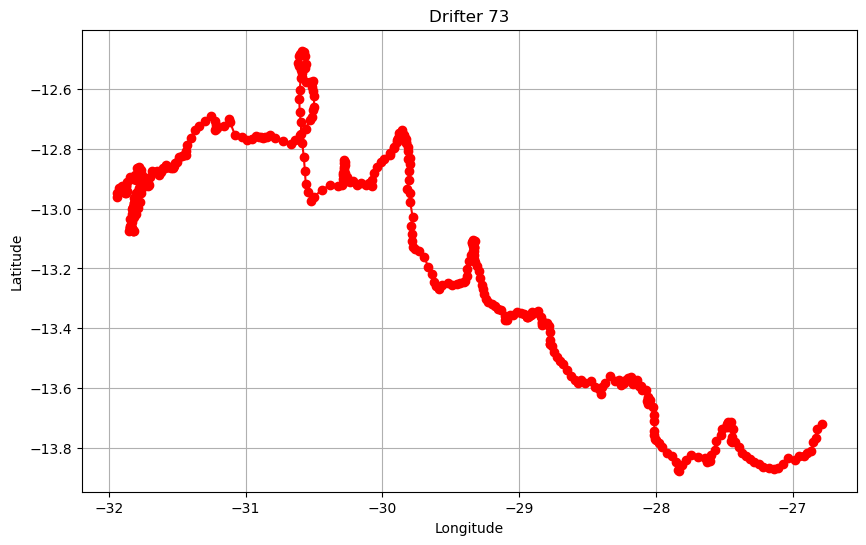

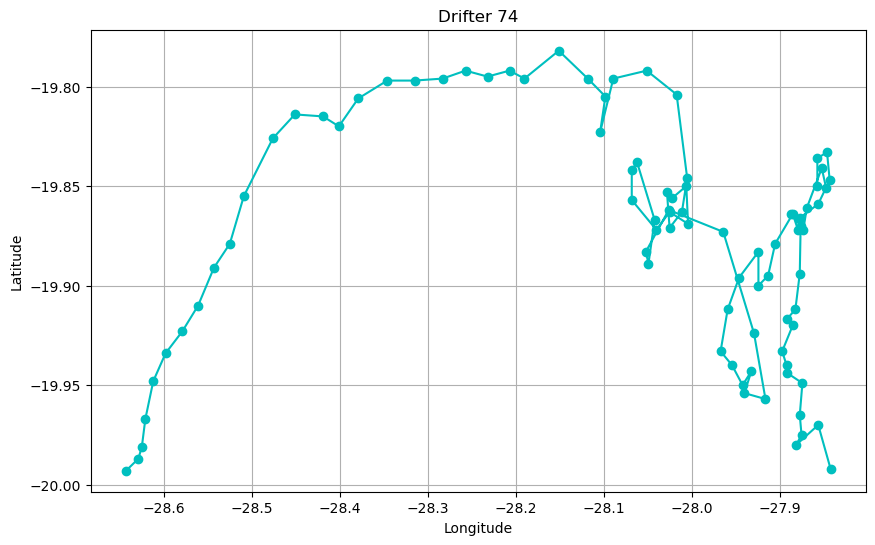

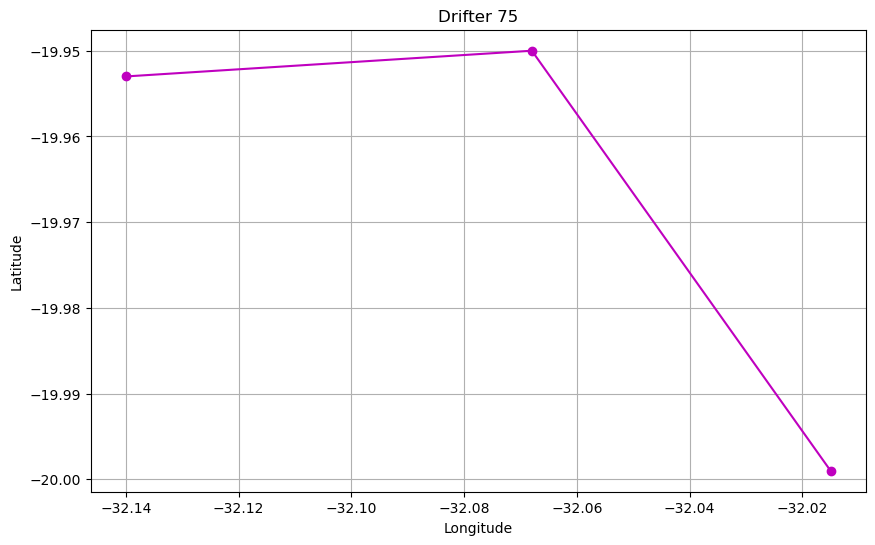

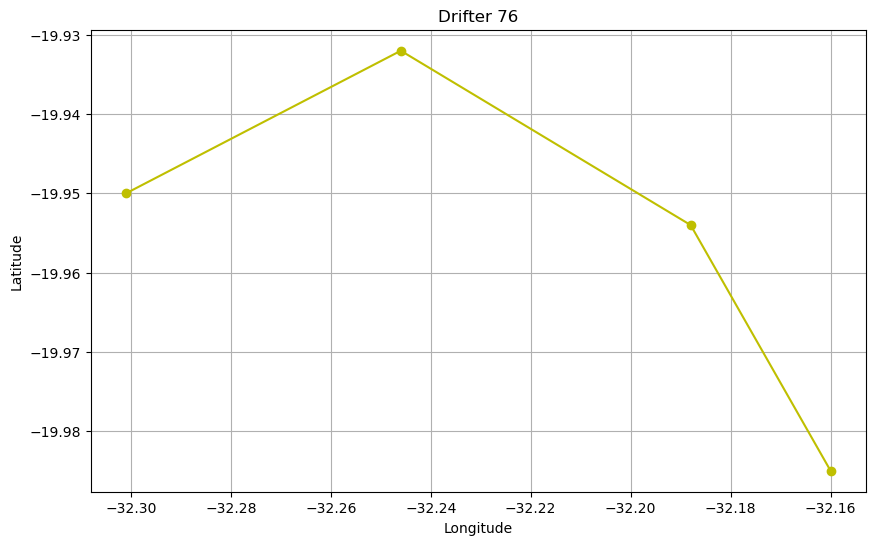

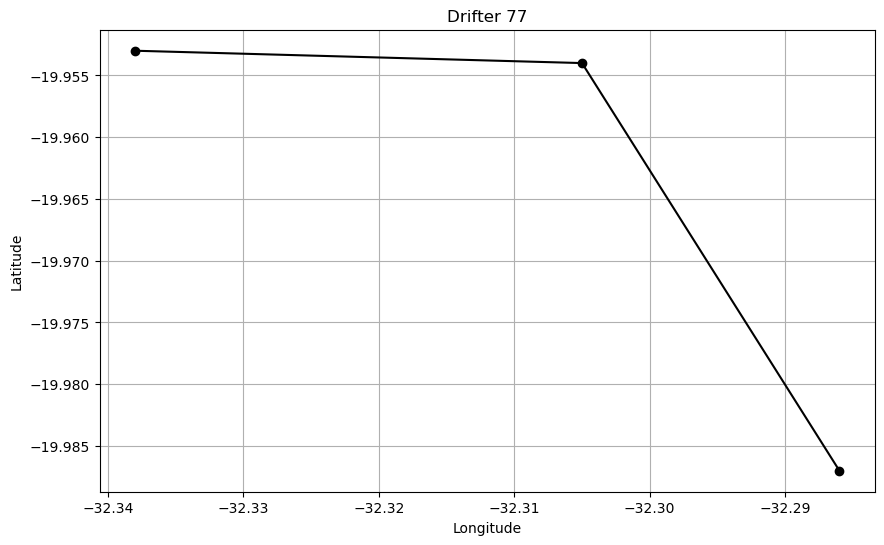

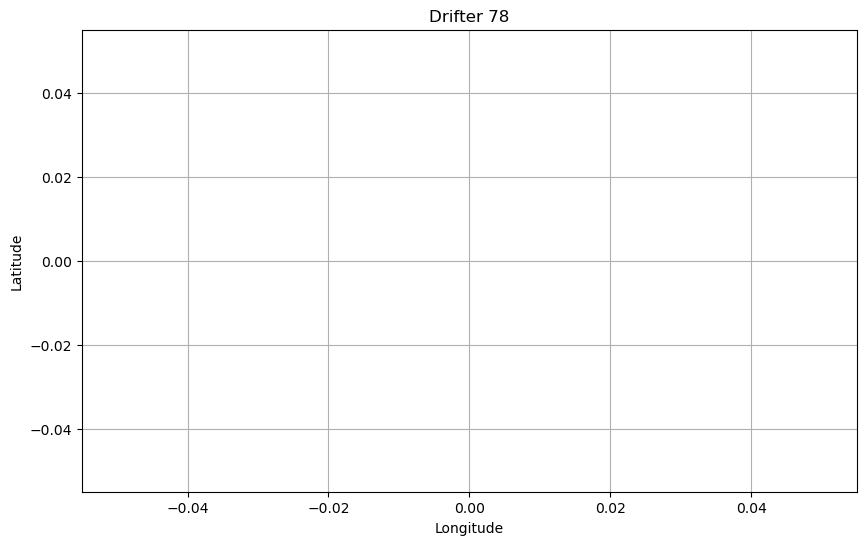

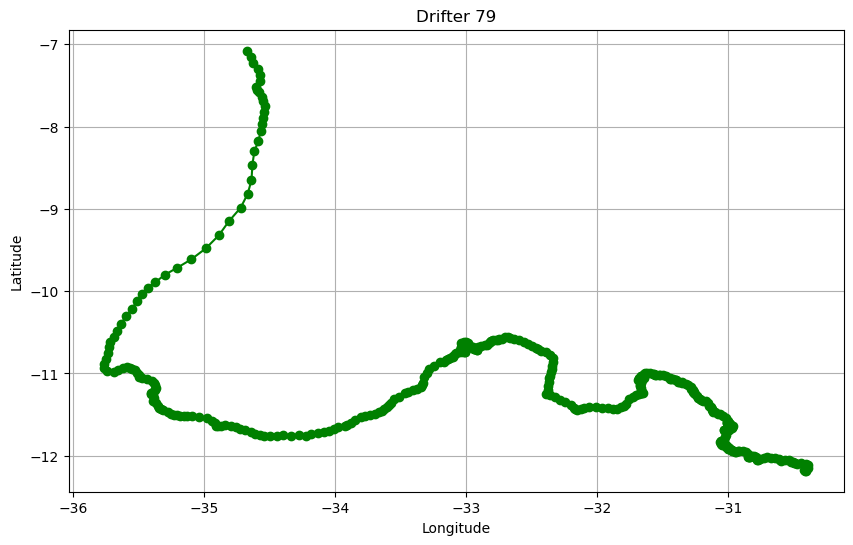

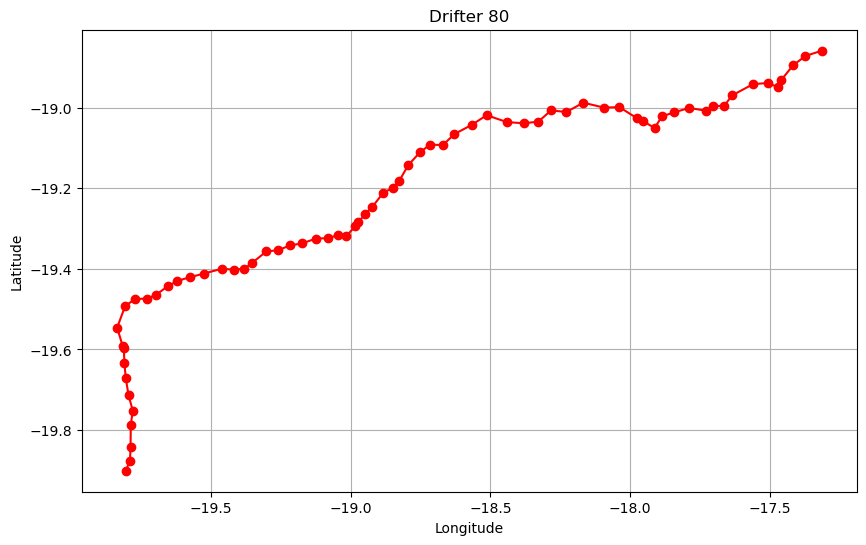

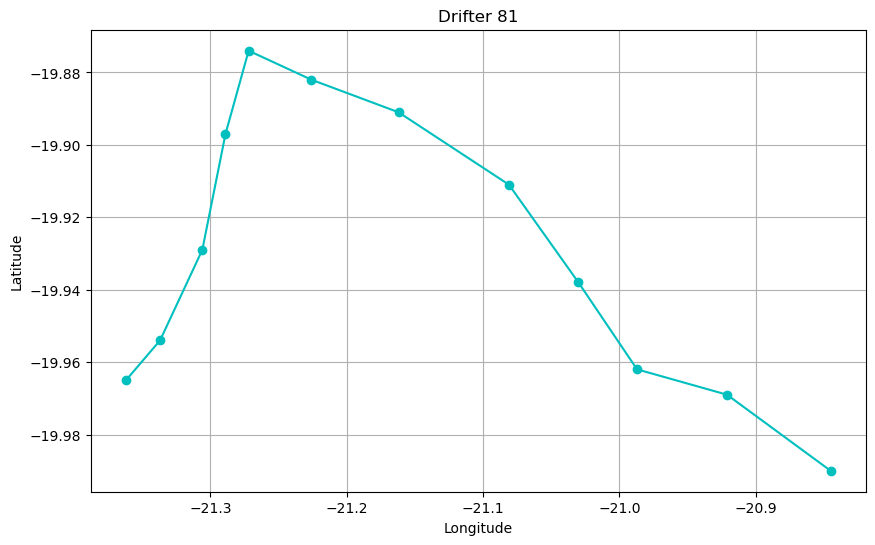

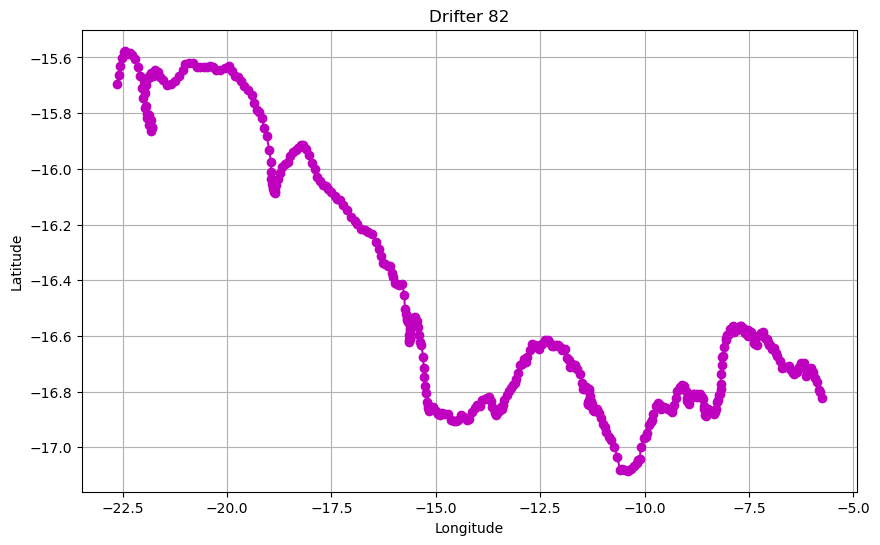

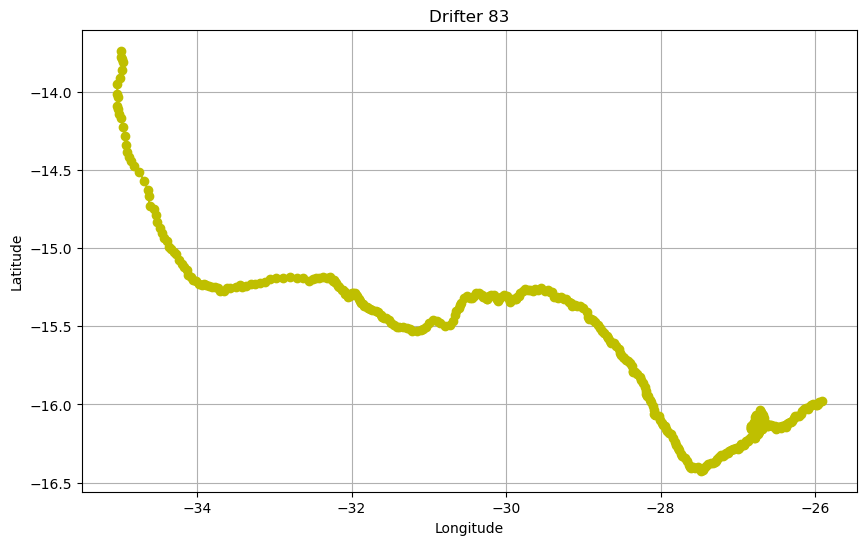

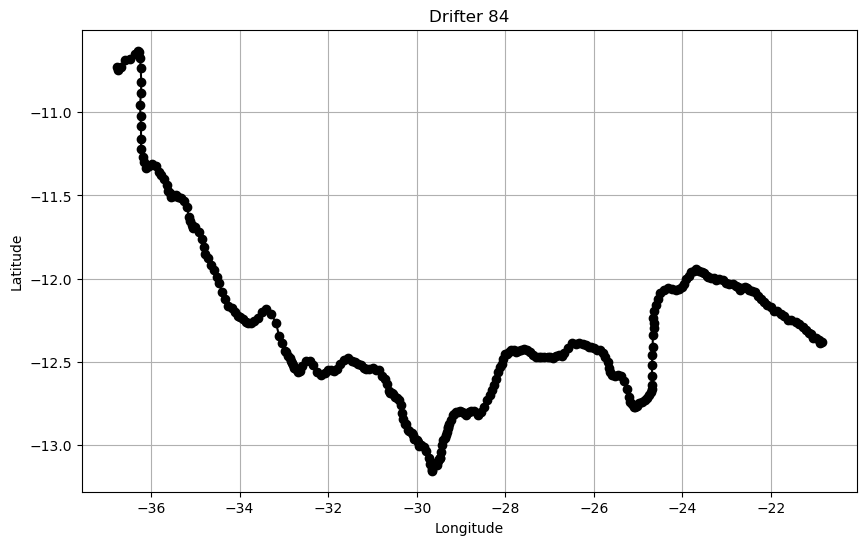

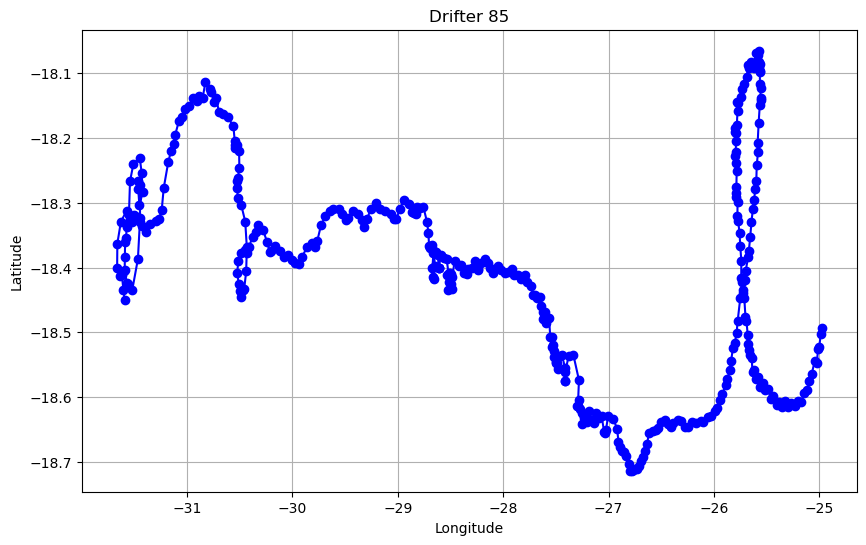

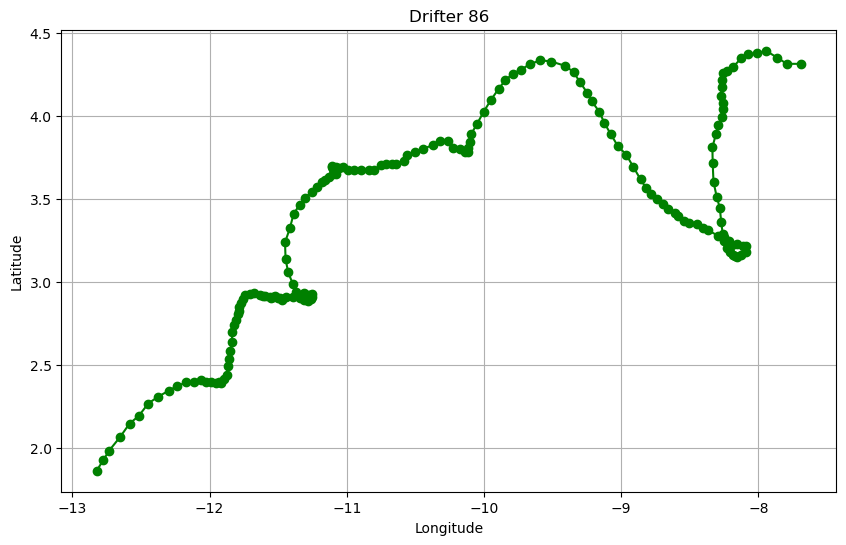

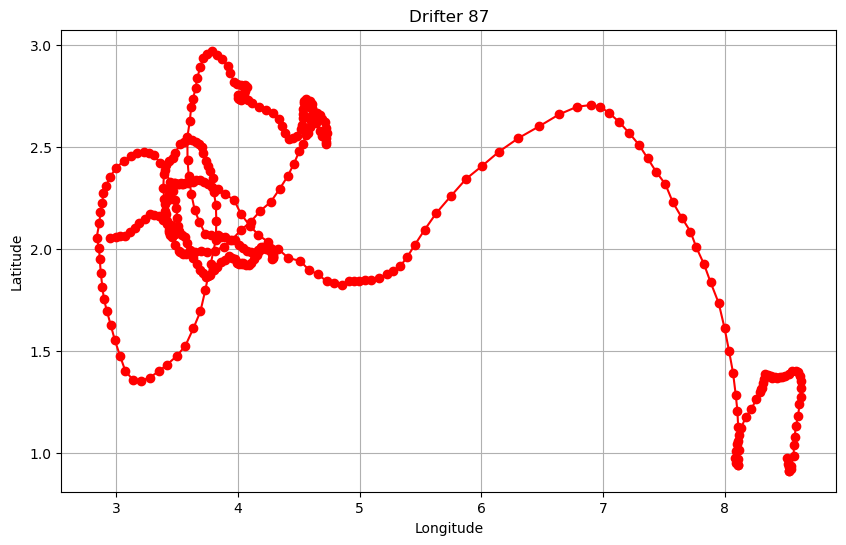

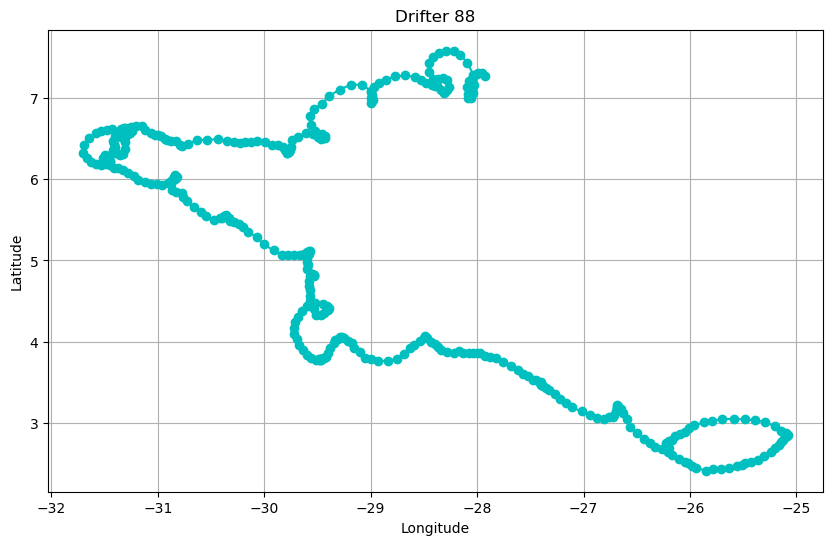

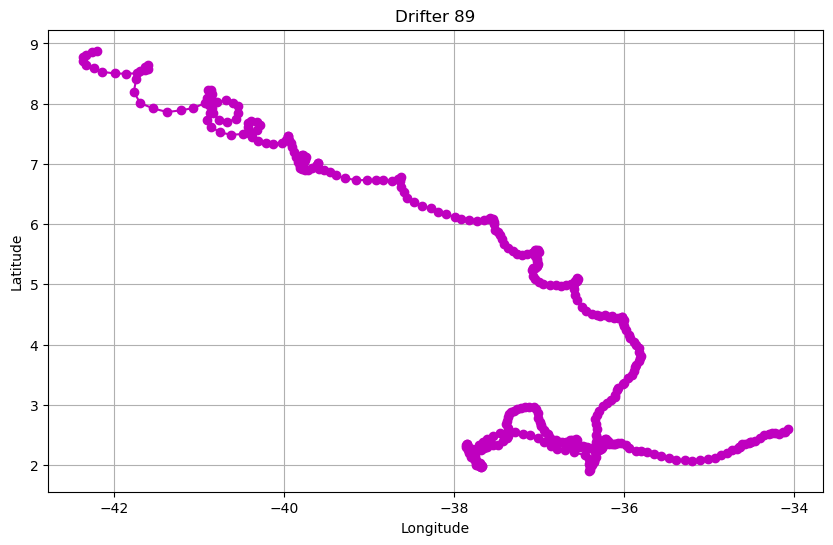

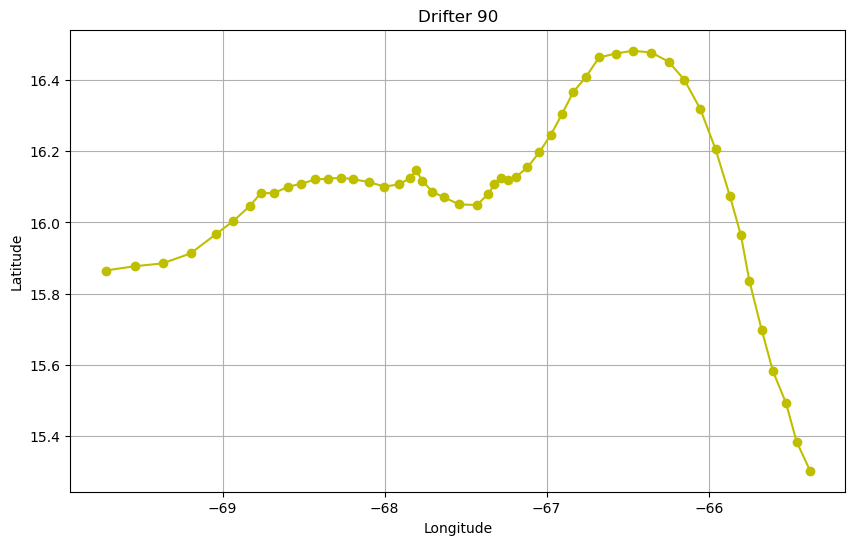

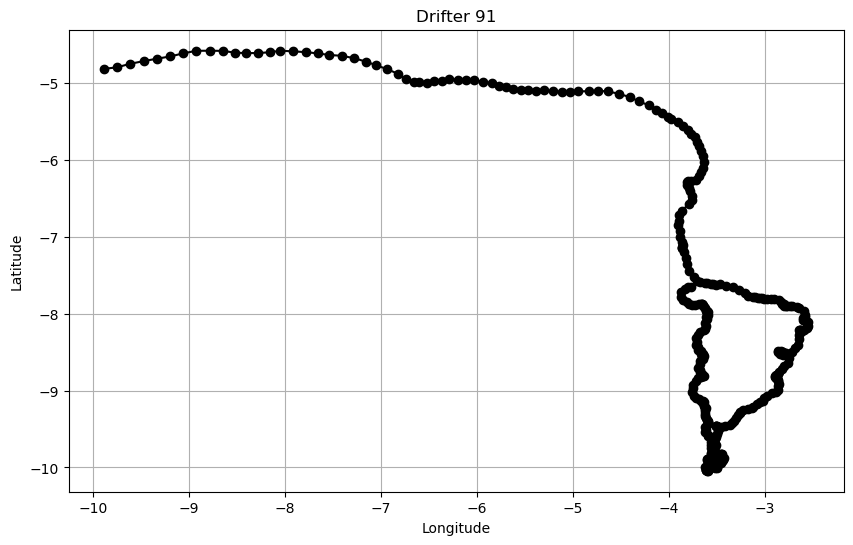

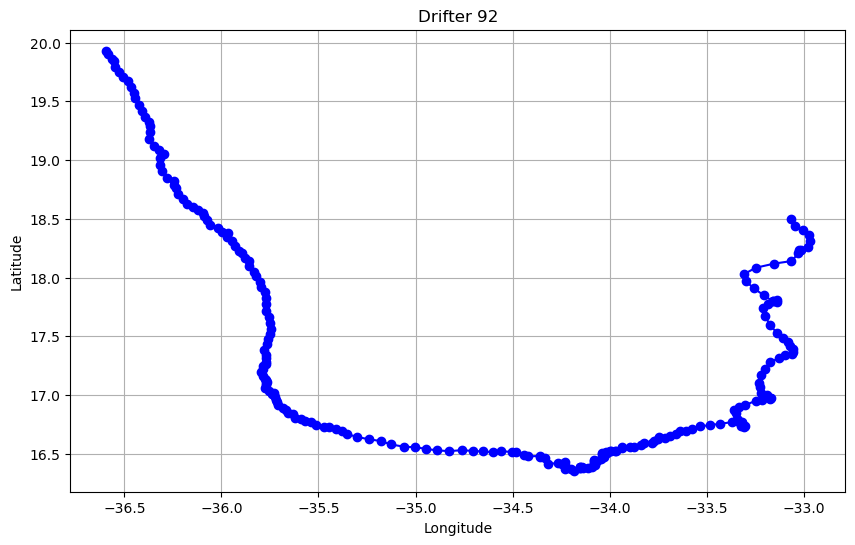

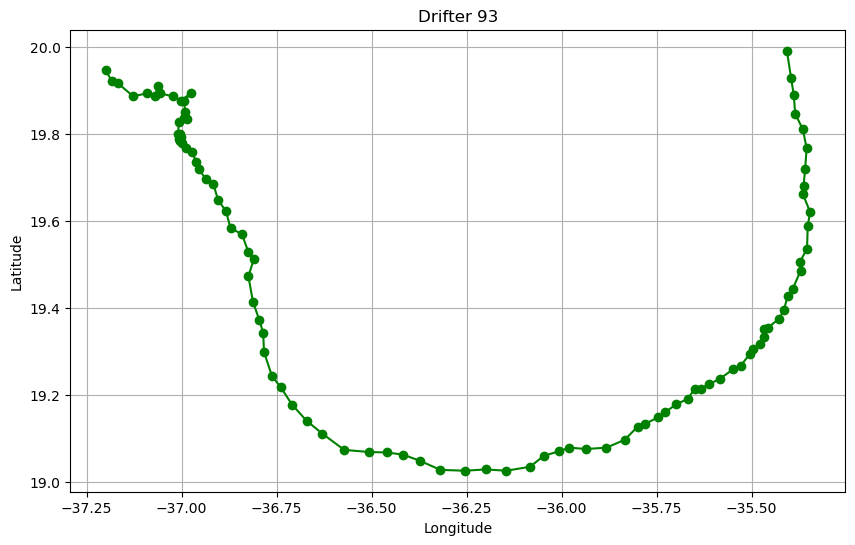

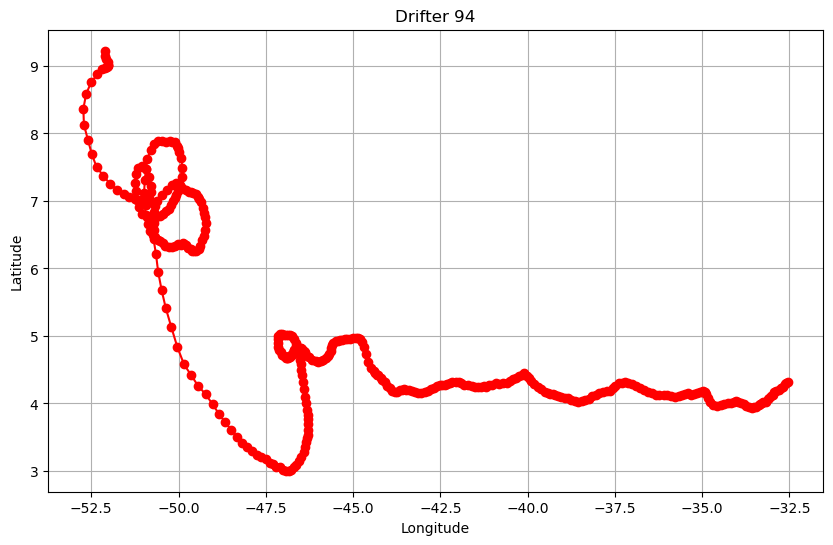

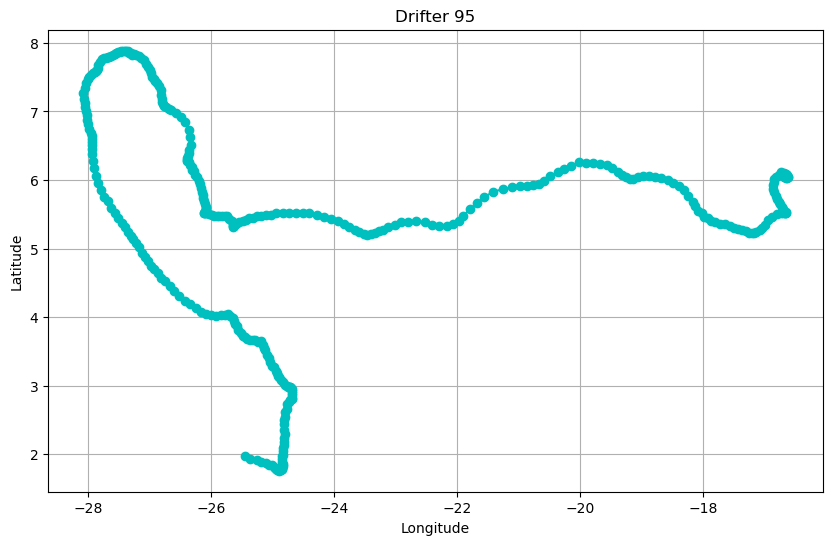

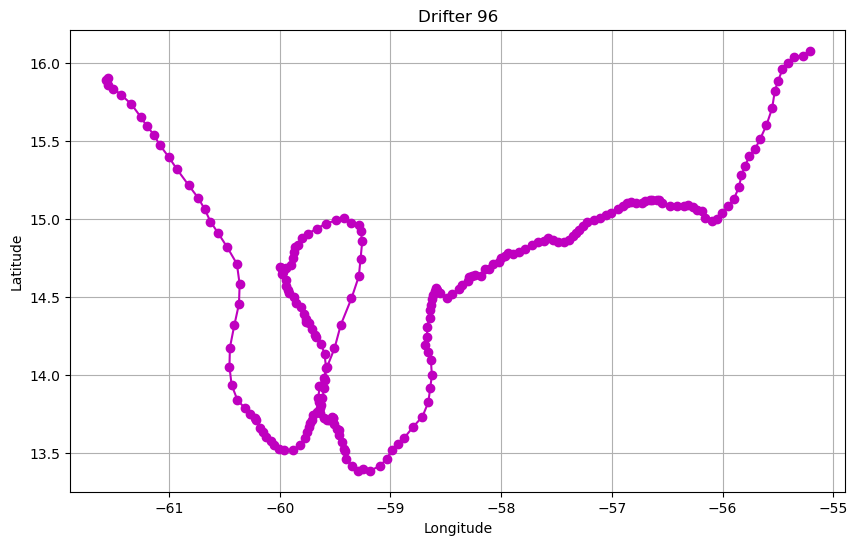

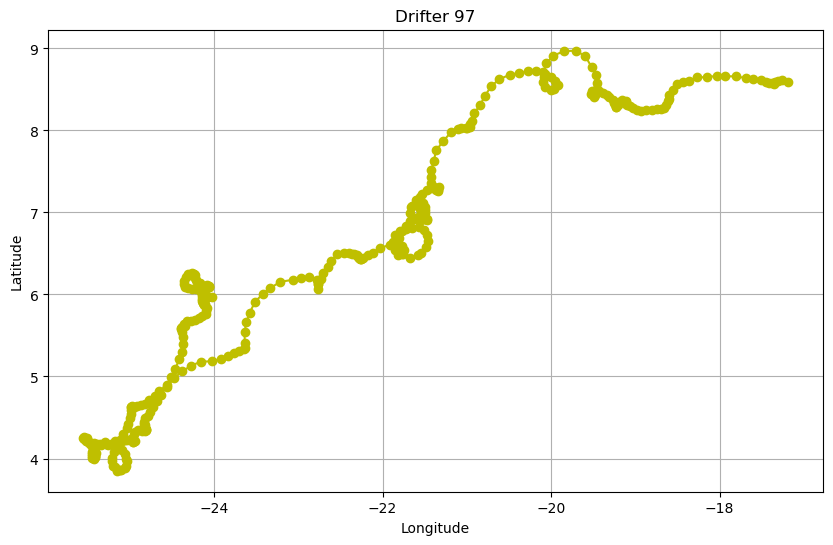

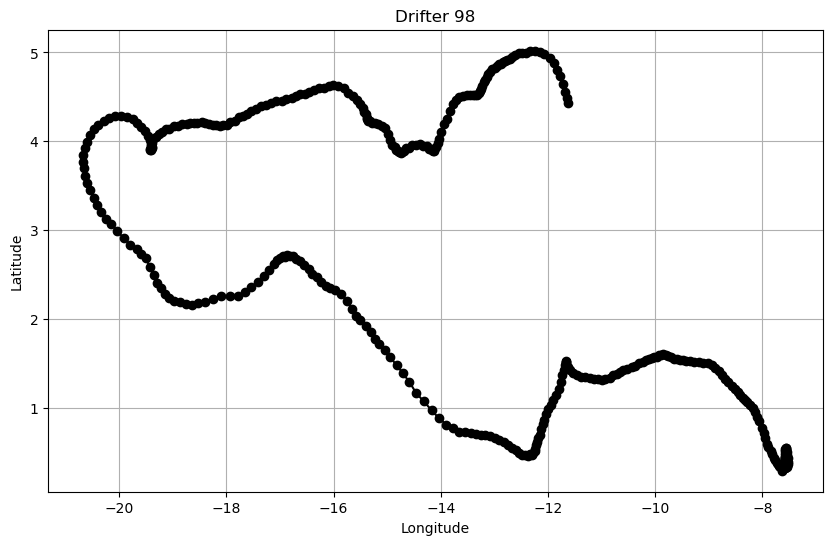

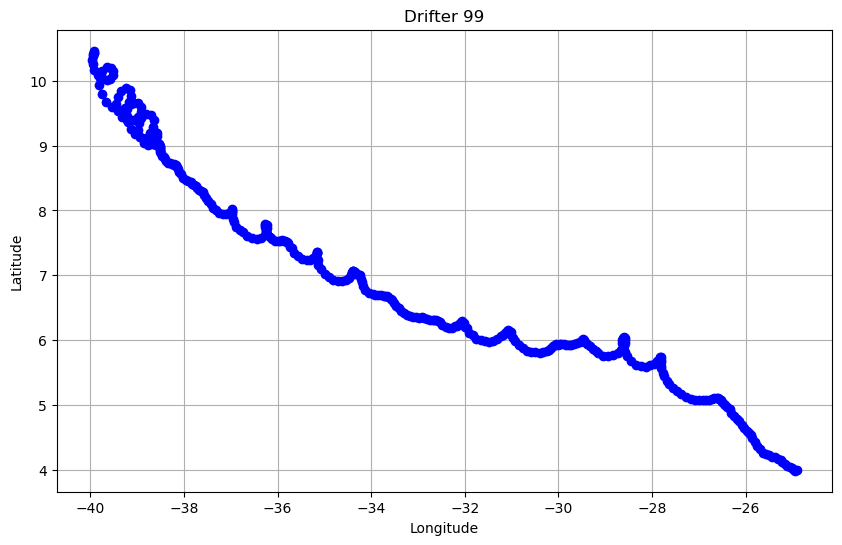

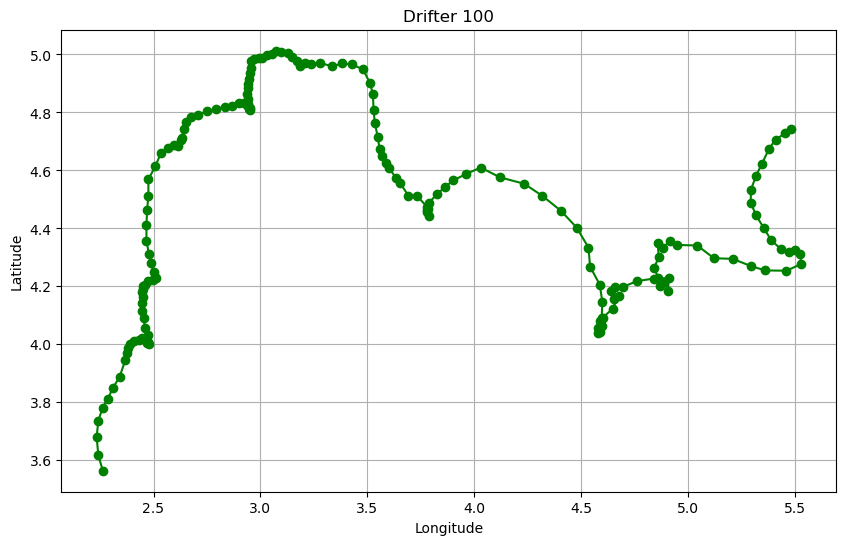

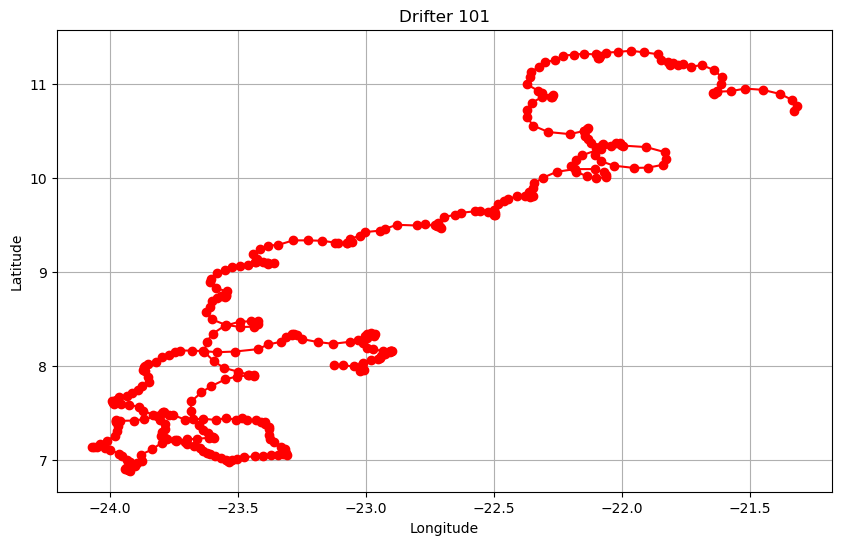

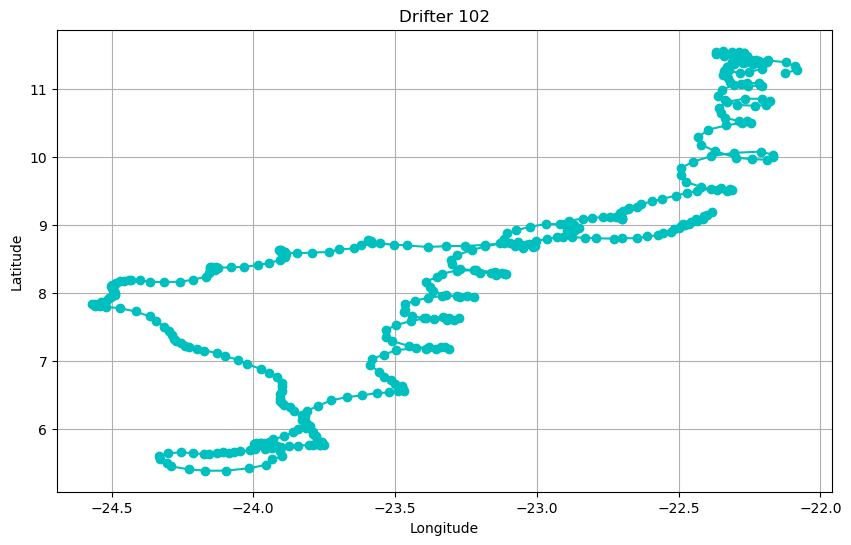

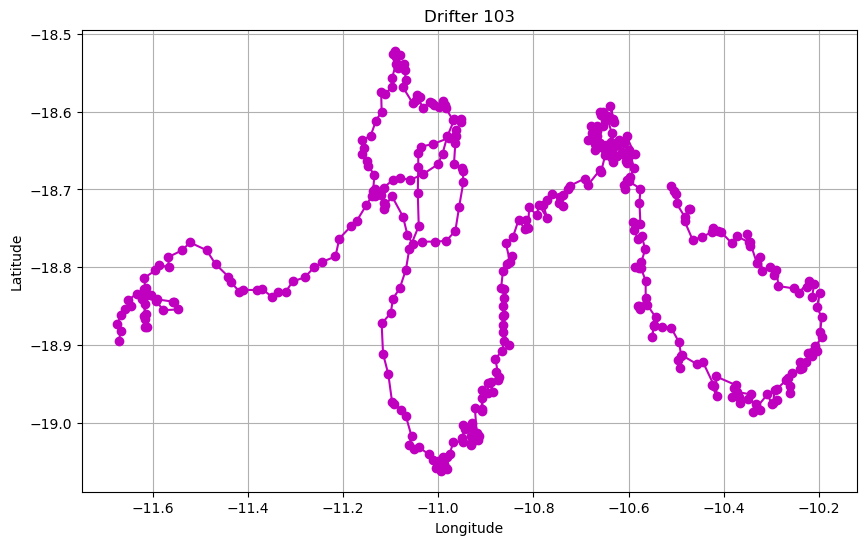

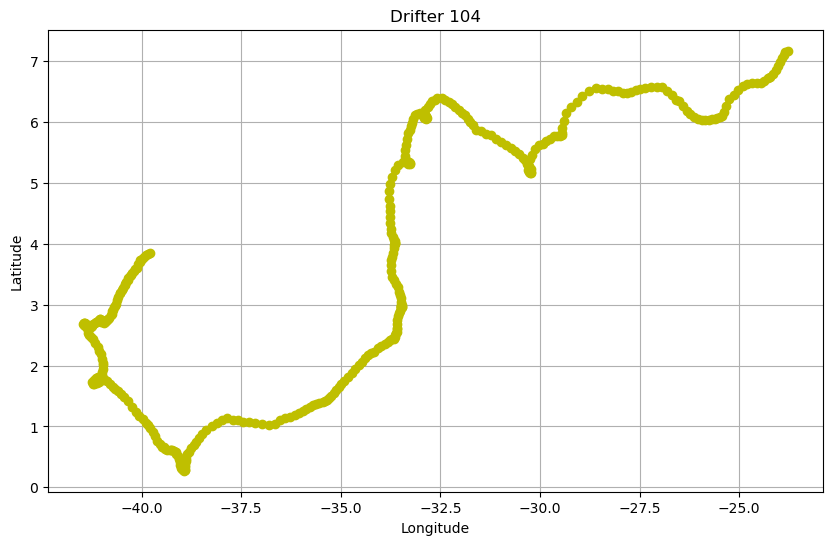

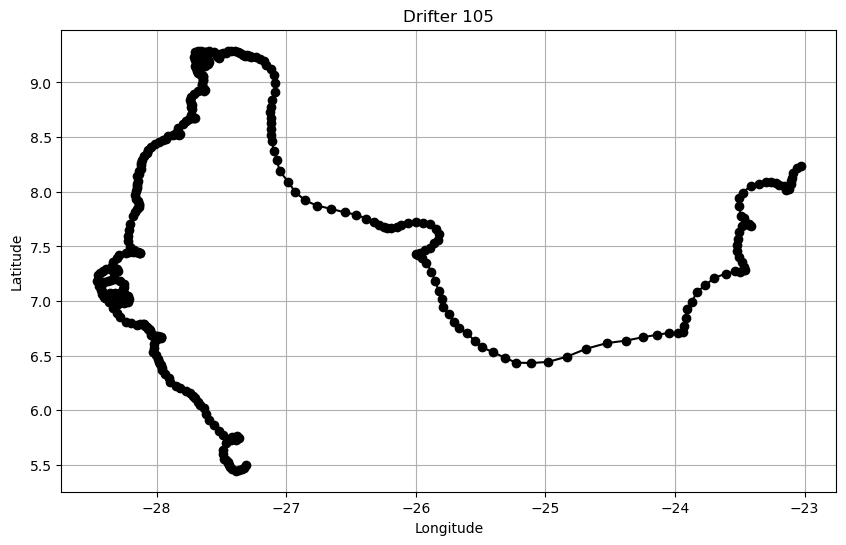

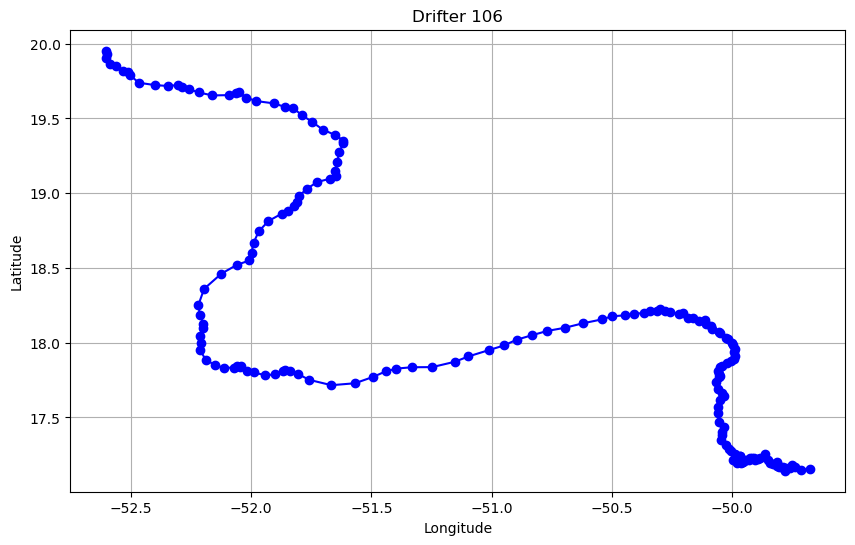

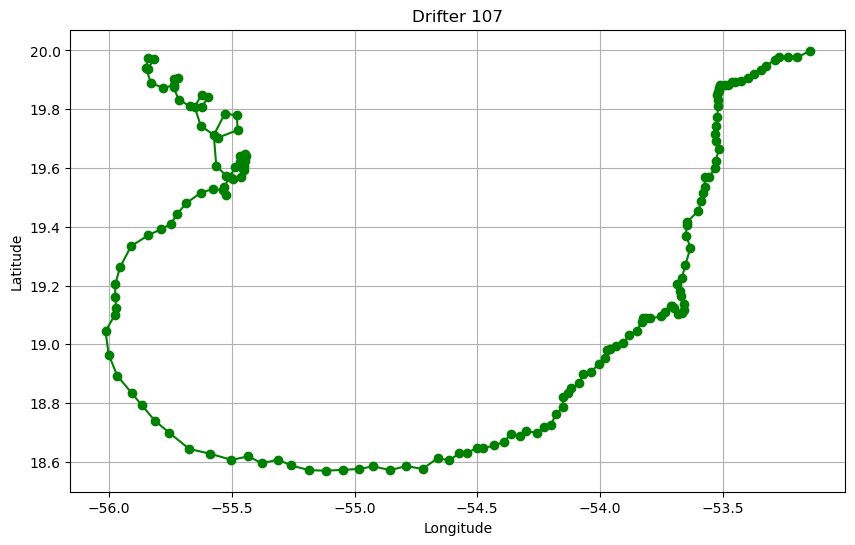

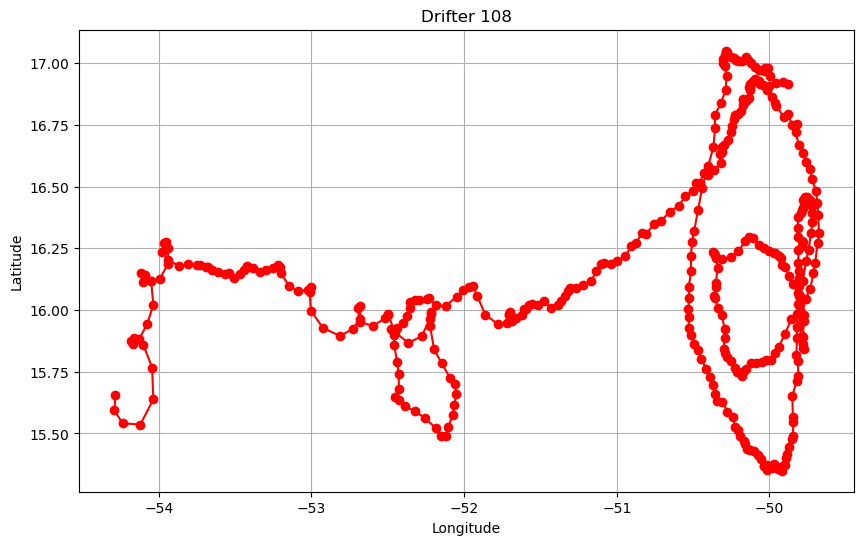

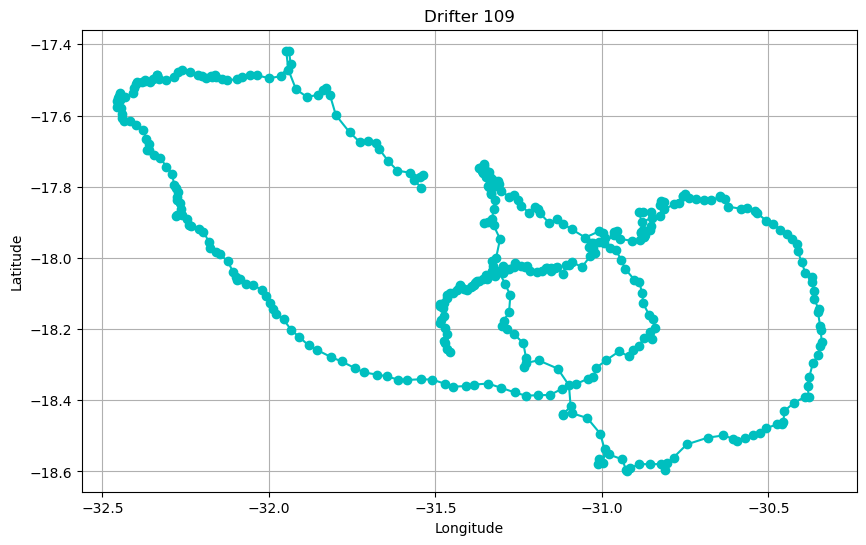

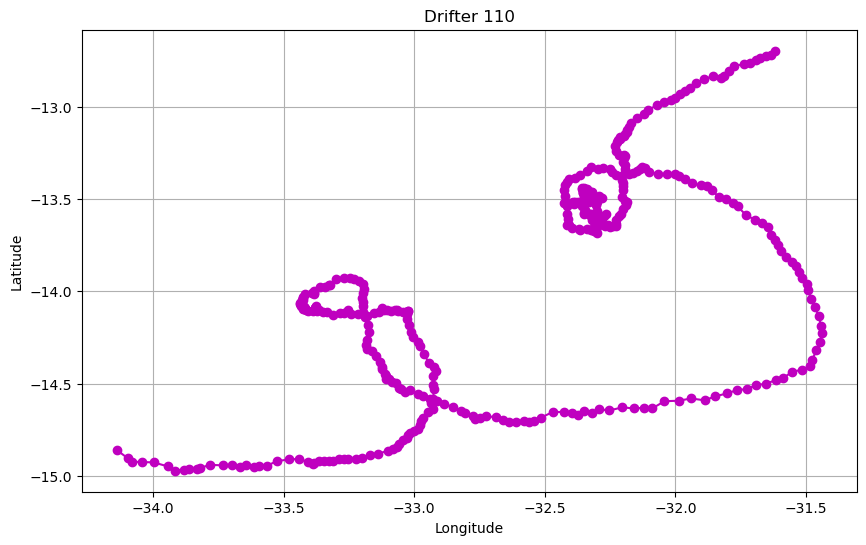

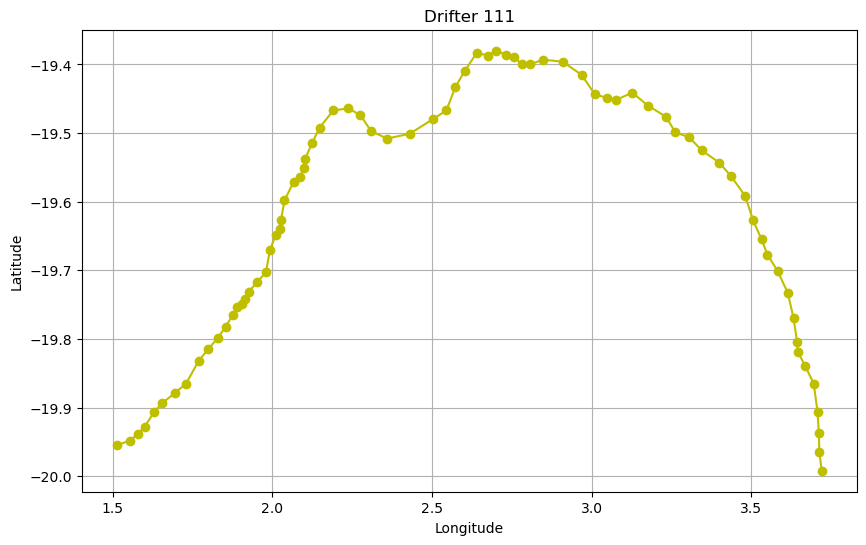

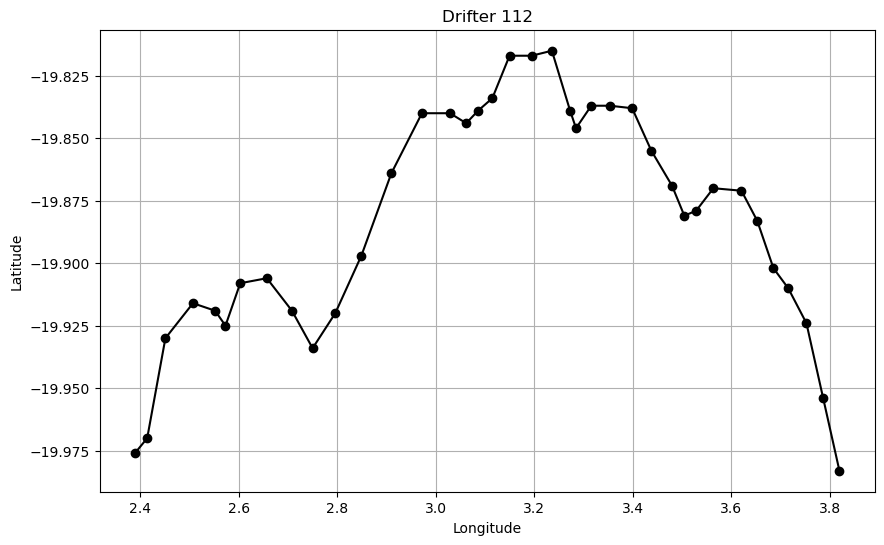

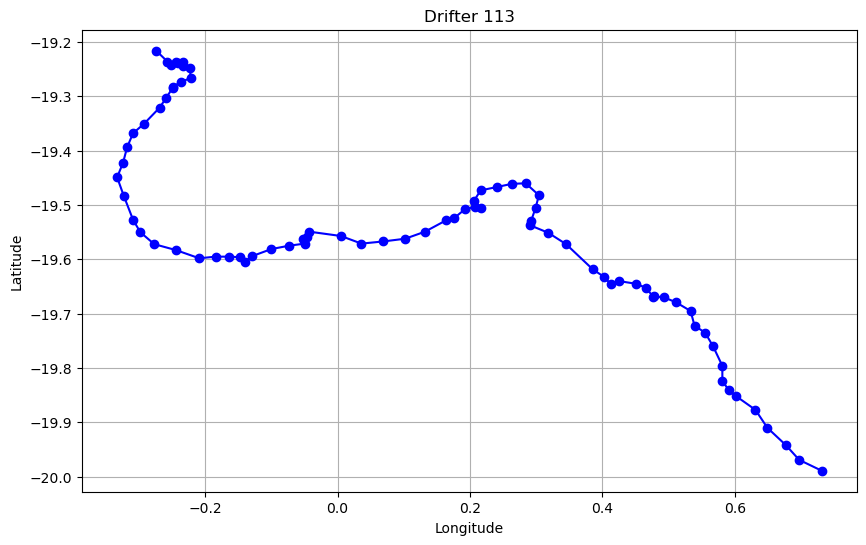

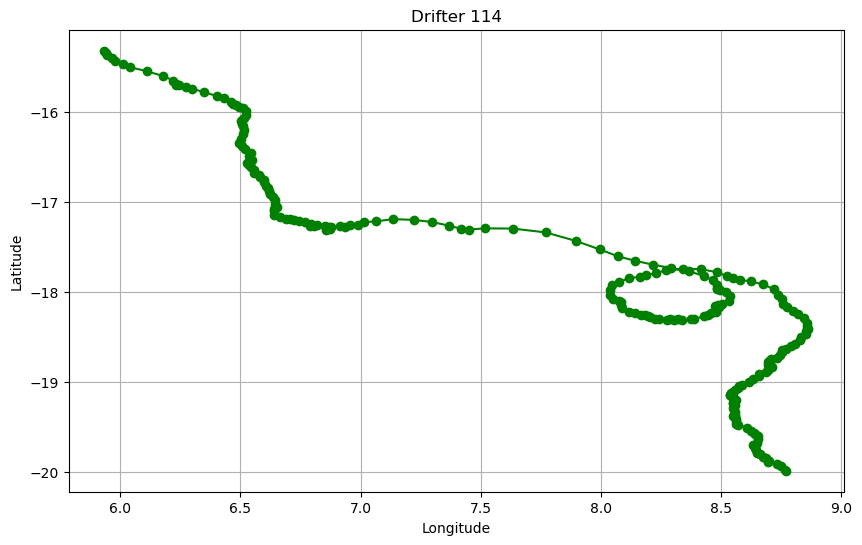

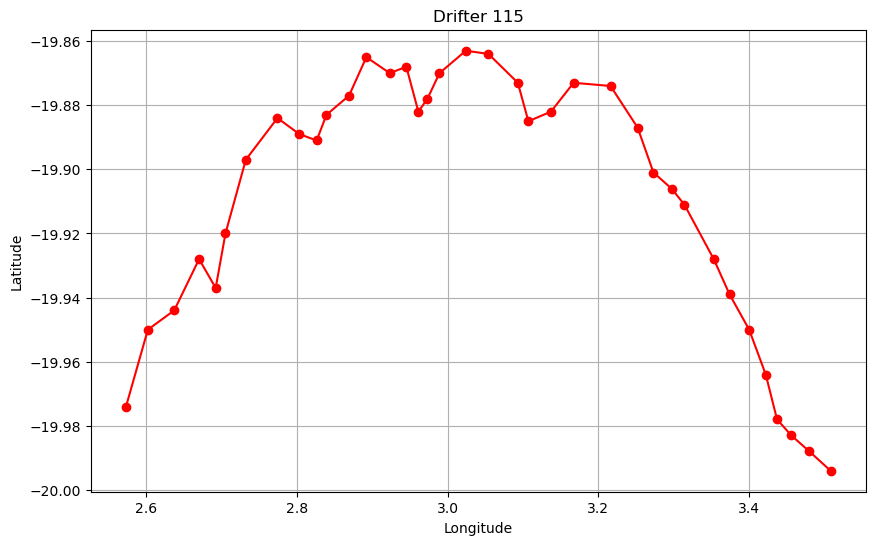

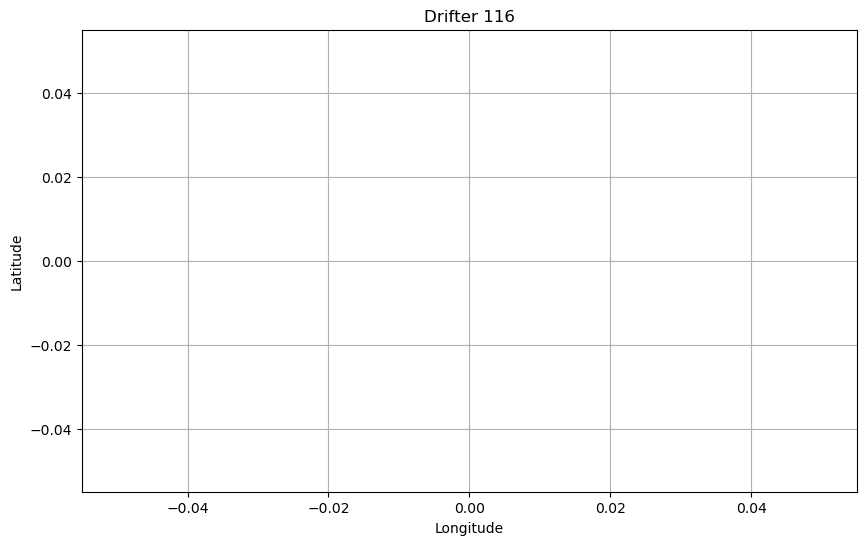

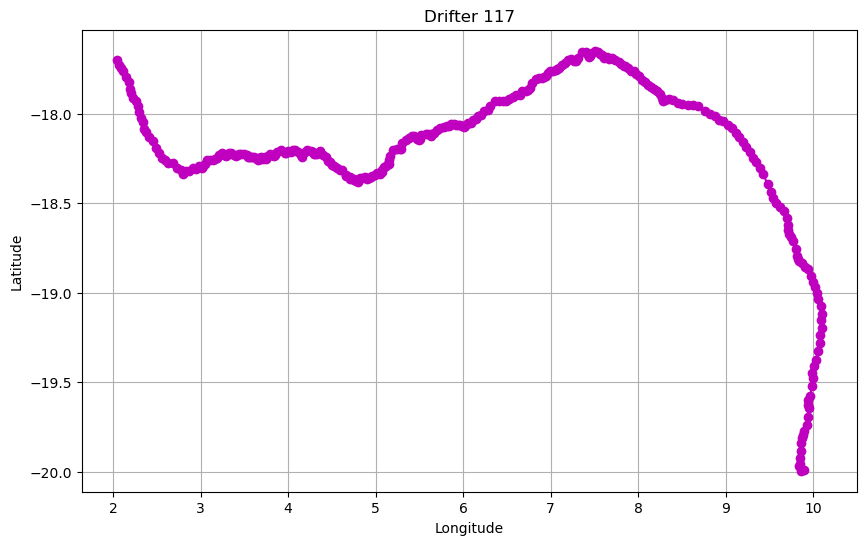

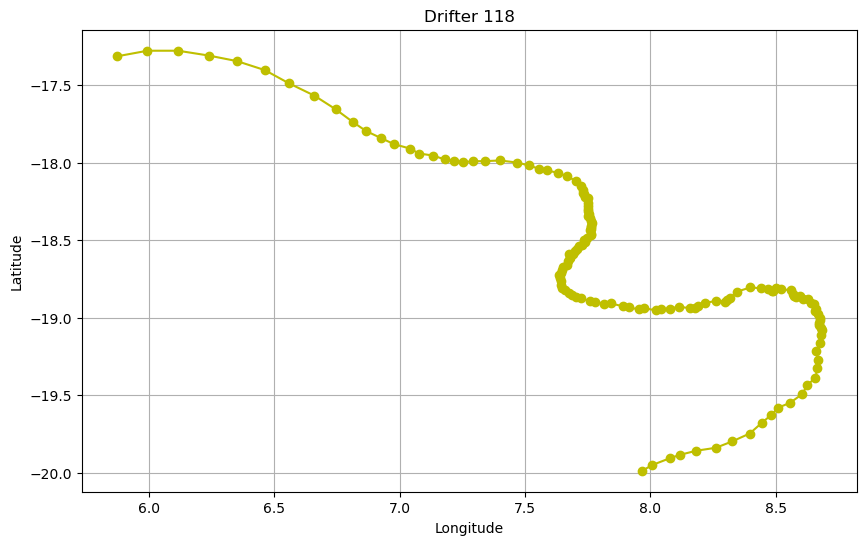

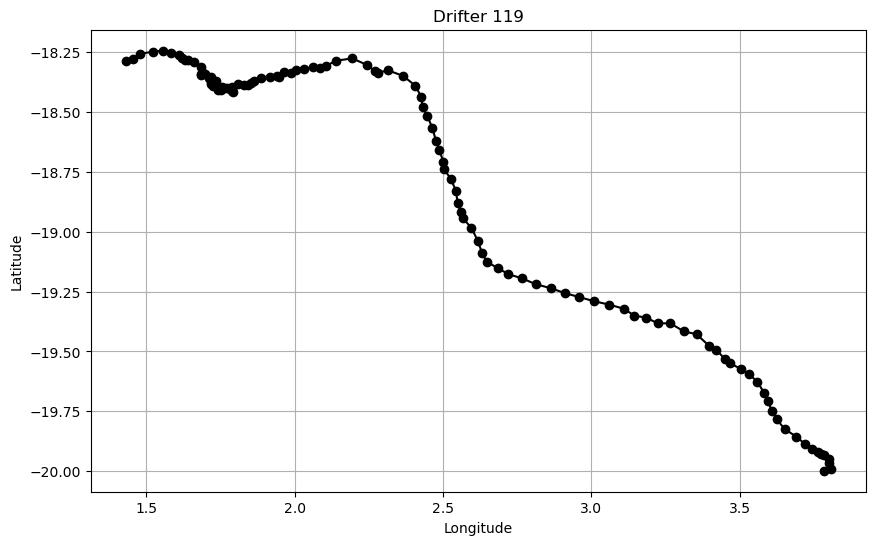

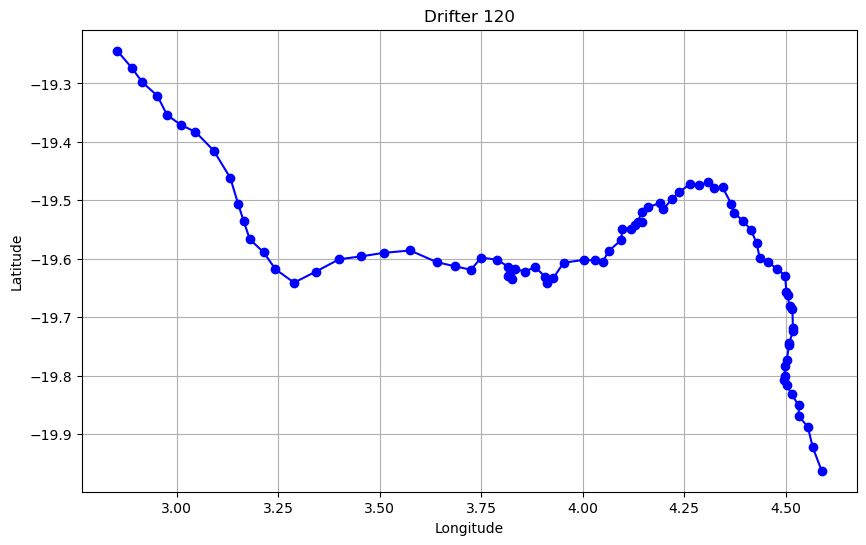

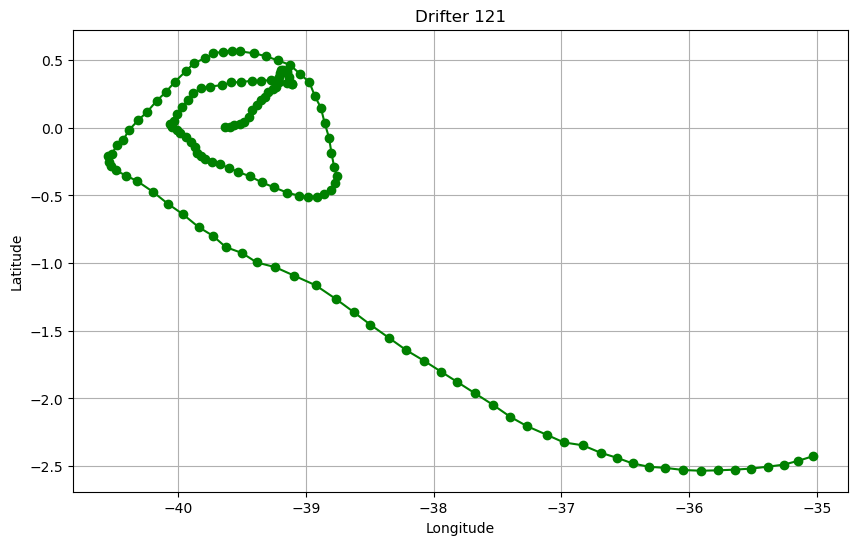

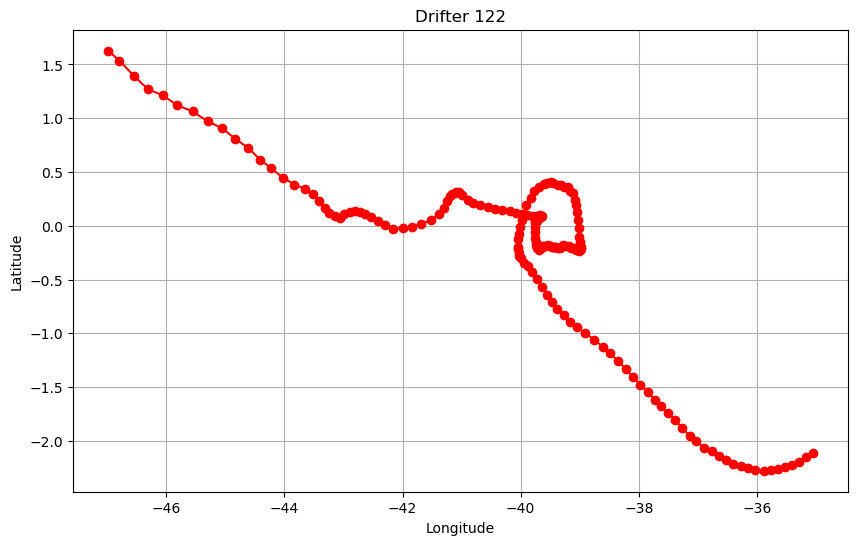

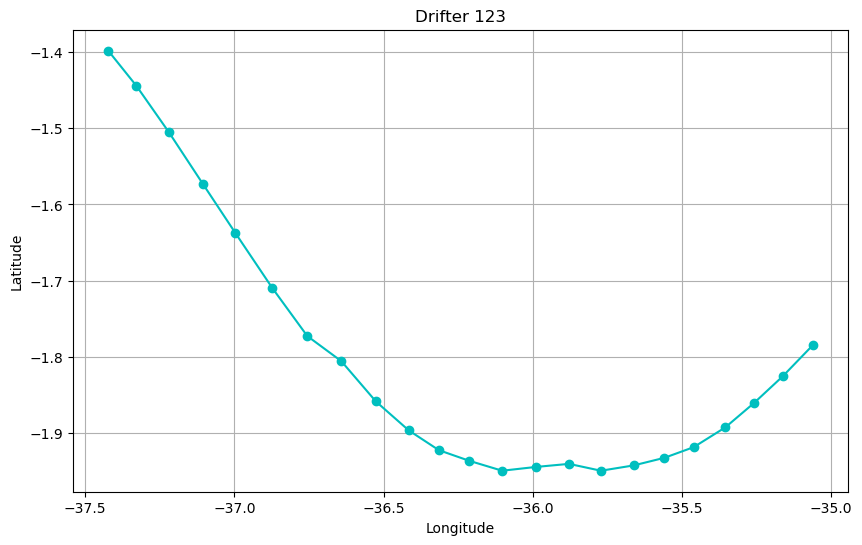

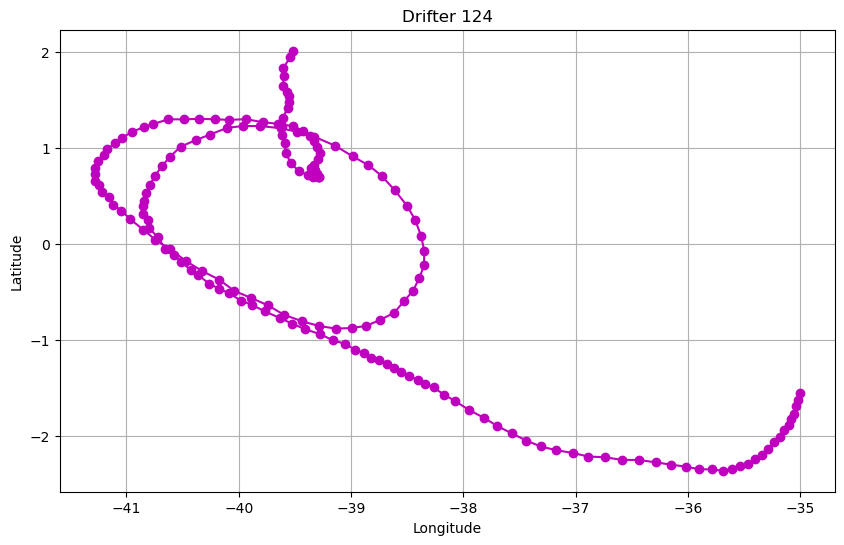

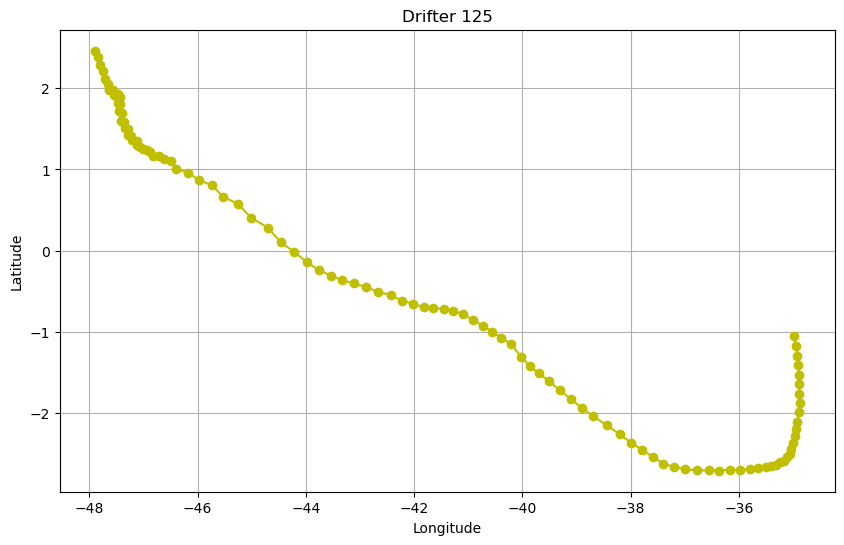

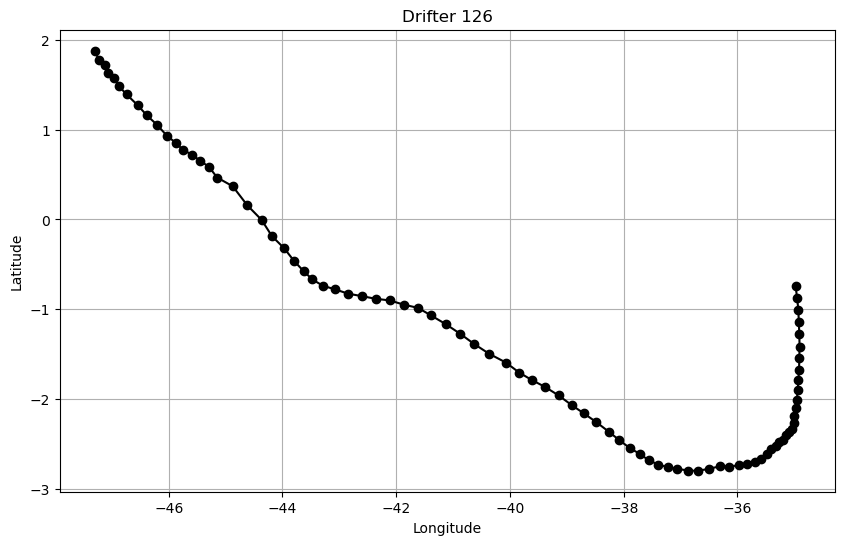

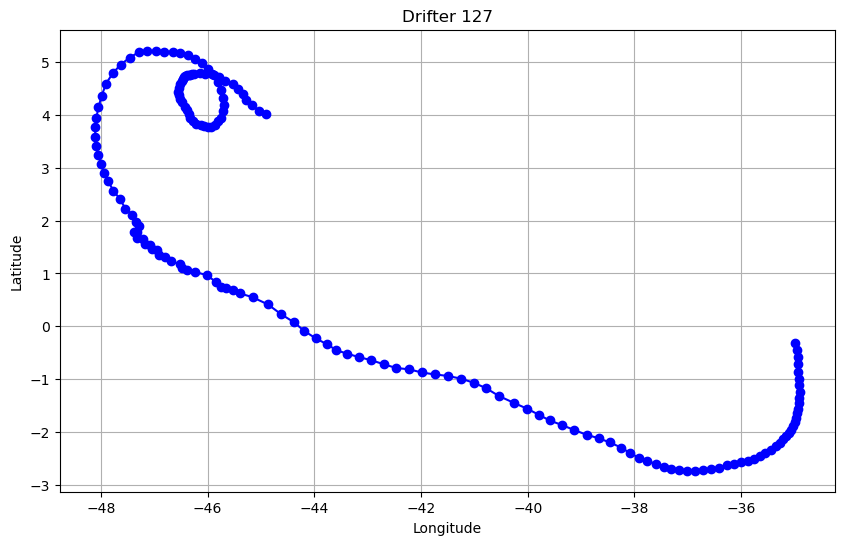

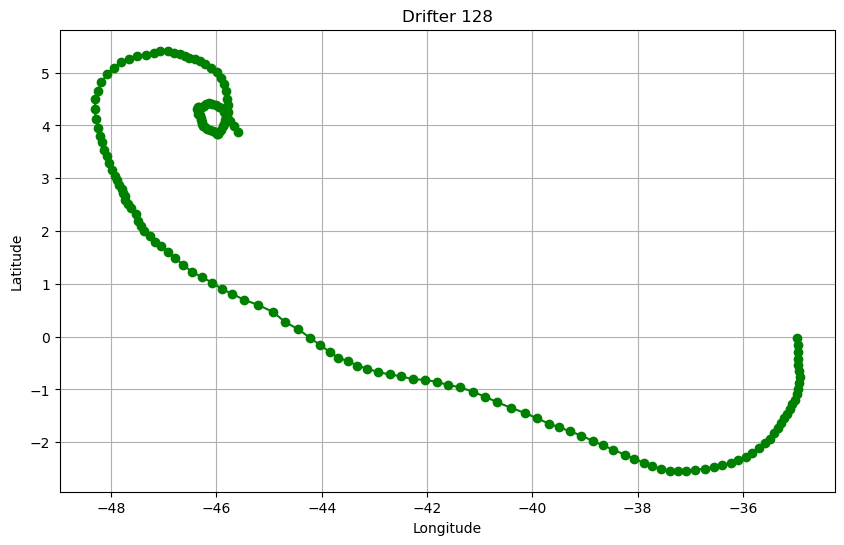

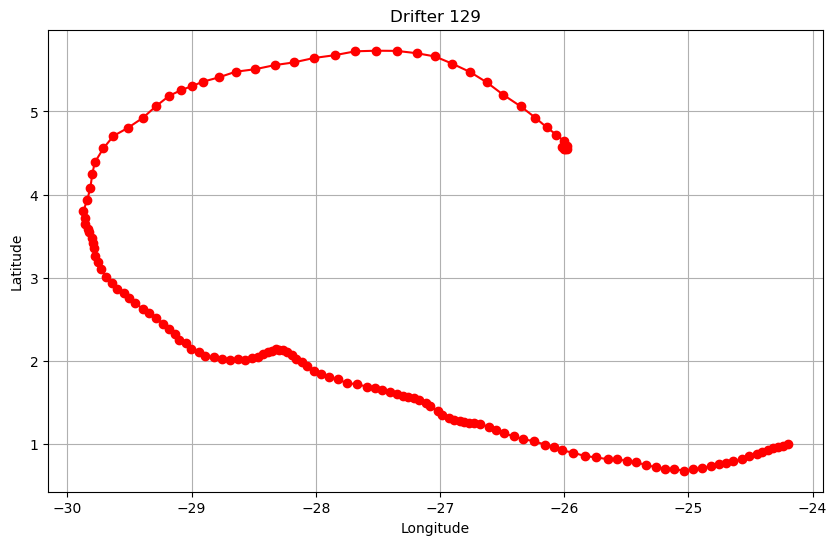

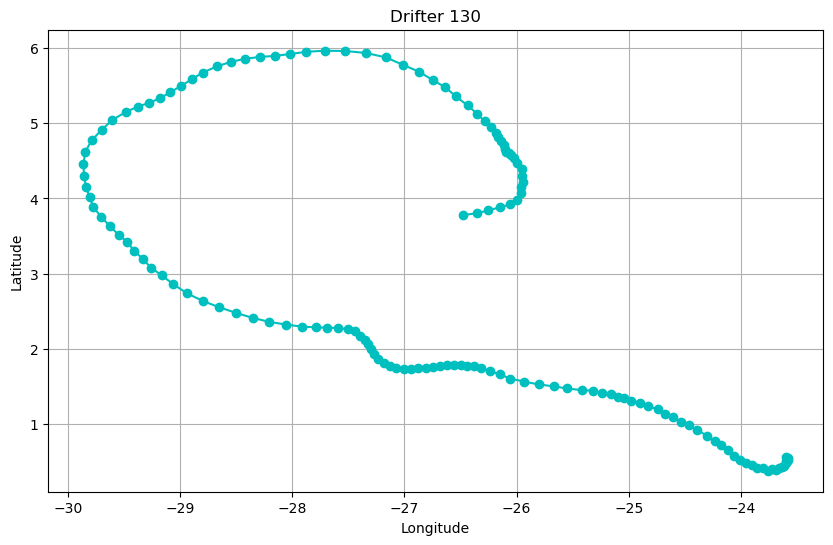

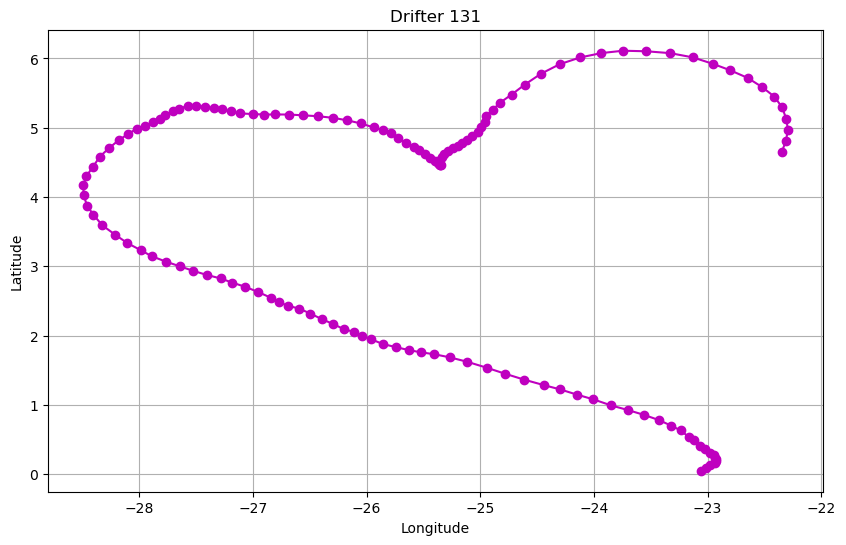

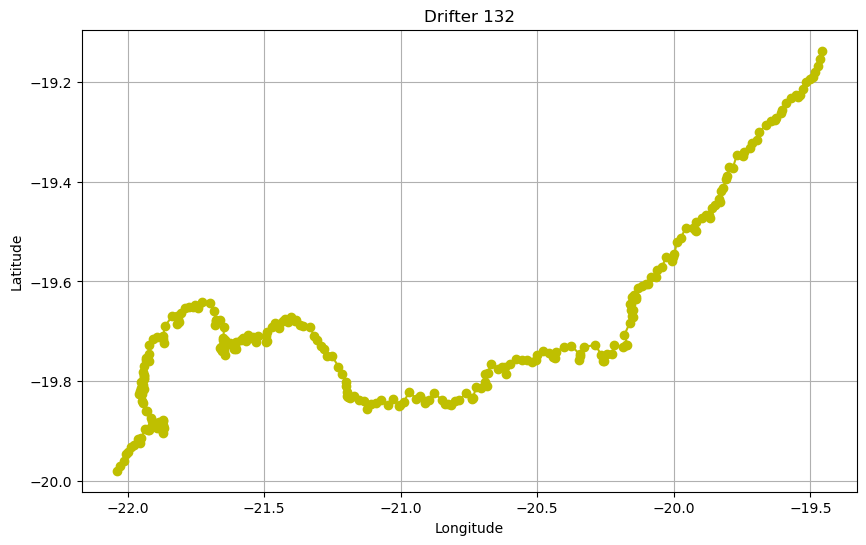

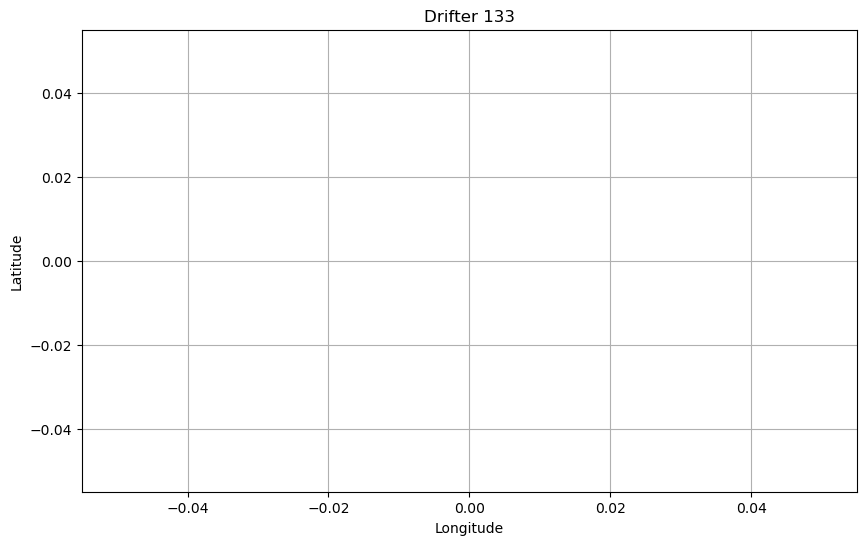

In [6]:
df = df.set_index('time')
# Calculate time differences between each sample
diff = np.roll(df.index.values, -1) - df.index.values

# Identify indices of drifters where the difference is not equal to 6 hours (21600000000000 ns)
indice_drifter = np.argwhere(diff != np.timedelta64(21600000000000, 'ns'))
indices = indice_drifter.flatten()

# List of colors for drifters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # You can add more colors if needed

# Visualize each drifter individually
for i in range(len(indices)):
    start_index = indices[i]+1
    if i == len(indices) - 1:
        end_index = len(df)
    else:
        end_index = indices[i + 1]

    drifter_data = df.iloc[start_index:end_index]

    # Plotting with a different color for each drifter
    plt.figure(figsize=(10, 6))
    plt.plot(drifter_data['Longitude'], drifter_data['Latitude'], marker='o', linestyle='-', color=colors[i % len(colors)])
    plt.title(f"Drifter {i+1}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

## Indices of drifters exhibiting inertial oscillations

## case of the zonal current

In [7]:
# Earth's angular velocity constant (in rad/s)
omega = 7.2921159e-5

# Function to calculate Coriolis frequency based on latitude
def coriolis_frequency(latitude):
    return 2 * omega * np.sin(np.radians(latitude))

# List to store indices of drifters exhibiting inertial oscillations
oscillating_drifters = []

# Analyzing each drifter
for i in range(len(indices)):
    start_index = indices[i]
    if i == len(indices) - 1:
        end_index = len(df)
    else:
        end_index = indices[i + 1]

    drifter_data = df.iloc[start_index:end_index]

    # Calculate theoretical Coriolis frequency for this drifter
    latitude = drifter_data['Latitude'].mean()  # Calculate mean latitude of the drifter
    theoretical_frequency = coriolis_frequency(latitude)

    # FFT on the latitude time series
    signal = drifter_data['ve'].values  # Use zonal current time series as signal
    n = len(signal)
    T = np.mean(np.diff(drifter_data.index))  # Mean time interval between samples
    T_seconds = T / np.timedelta64(1, 's')
    frequencies = fftfreq(n, d=T_seconds)

    fft_values = fft(signal)
    fft_amplitudes = np.abs(fft_values)

    # Check if fft_amplitudes contain significant values
    if len(fft_amplitudes[1:n//2]) > 0:
        dominant_frequency_index = np.argmax(fft_amplitudes[1:n//2]) + 1  # Ignore frequency 0 and negative frequencies
        dominant_frequency = frequencies[dominant_frequency_index]
        dominant_frequency_hz = np.abs(dominant_frequency)

        # Compare dominant frequency obtained by FFT with theoretical Coriolis frequency
        tolerance = 0.1  # Tolerance to consider a match, in Hz
        if np.abs(dominant_frequency_hz - theoretical_frequency) < tolerance:
            oscillating_drifters.append(i)

        # Display for each drifter (optional)
        print(f"Drifter {i+1}:")
        print(f"Theoretical Coriolis Frequency: {theoretical_frequency} Hz")
        print(f"Dominant Frequency from FFT: {dominant_frequency_hz} Hz")
        print("")

    else:
        print(f"No significant values found for drifter {i+1}. Check signal data.")

# Calculate percentage of drifters exhibiting inertial oscillations
total_drifters = len(indices)
percentage_oscillating = (len(oscillating_drifters) / total_drifters) * 100

# Display indices of drifters exhibiting inertial oscillations
print("Indices of drifters exhibiting inertial oscillations:", oscillating_drifters)
print(f"Percentage of drifters exhibiting inertial oscillations: {percentage_oscillating:.2f}%")

Drifter 1:
Theoretical Coriolis Frequency: -2.8430193079869564e-05 Hz
Dominant Frequency from FFT: 3.441810802346779e-07 Hz

Drifter 2:
Theoretical Coriolis Frequency: 9.373294102172896e-06 Hz
Dominant Frequency from FFT: 2.1471637750711e-06 Hz

Drifter 3:
Theoretical Coriolis Frequency: -3.0553363348626276e-05 Hz
Dominant Frequency from FFT: 1.0262085879373524e-06 Hz

Drifter 4:
Theoretical Coriolis Frequency: -4.238712373836019e-05 Hz
Dominant Frequency from FFT: 5.225854419579837e-06 Hz

Drifter 5:
Theoretical Coriolis Frequency: -4.908366300441098e-05 Hz
Dominant Frequency from FFT: 1.573341755002666e-07 Hz

No significant values found for drifter 6. Check signal data.
Drifter 7:
Theoretical Coriolis Frequency: -4.156447345948549e-05 Hz
Dominant Frequency from FFT: 5.487184268388411e-07 Hz

Drifter 8:
Theoretical Coriolis Frequency: -4.613833197185448e-05 Hz
Dominant Frequency from FFT: 4.617938645783769e-05 Hz

Drifter 9:
Theoretical Coriolis Frequency: -2.4269189157419584e-05 Hz


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: divide by zero encountered in divide
  ret = ret.dtype.type(ret / rcount)


## case of the zonal current

In [8]:
# Earth's angular velocity constant (in rad/s)
omega = 7.2921159e-5

# Function to calculate Coriolis frequency based on latitude
def coriolis_frequency(latitude):
    return 2 * omega * np.sin(np.radians(latitude))

# List to store indices of drifters exhibiting inertial oscillations
oscillating_drifters = []

# Analyzing each drifter
for i in range(len(indices)):
    start_index = indices[i]
    if i == len(indices) - 1:
        end_index = len(df)
    else:
        end_index = indices[i + 1]

    drifter_data = df.iloc[start_index:end_index]

    # Calculate theoretical Coriolis frequency for this drifter
    latitude = drifter_data['Latitude'].mean()  # Calculate mean latitude of the drifter
    theoretical_frequency = coriolis_frequency(latitude)

    # FFT on the latitude time series
    signal = drifter_data['vn'].values  # Use meridional current time series as signal
    n = len(signal)
    T = np.mean(np.diff(drifter_data.index))  # Mean time interval between samples
    T_seconds = T / np.timedelta64(1, 's')
    frequencies = fftfreq(n, d=T_seconds)

    fft_values = fft(signal)
    fft_amplitudes = np.abs(fft_values)

    # Check if fft_amplitudes contain significant values
    if len(fft_amplitudes[1:n//2]) > 0:
        dominant_frequency_index = np.argmax(fft_amplitudes[1:n//2]) + 1  # Ignore frequency 0 and negative frequencies
        dominant_frequency = frequencies[dominant_frequency_index]
        dominant_frequency_hz = np.abs(dominant_frequency)

        # Compare dominant frequency obtained by FFT with theoretical Coriolis frequency
        tolerance = 0.1  # Tolerance to consider a match, in Hz
        if np.abs(dominant_frequency_hz - theoretical_frequency) < tolerance:
            oscillating_drifters.append(i)

        # Display for each drifter (optional)
        print(f"Drifter {i+1}:")
        print(f"Theoretical Coriolis Frequency: {theoretical_frequency} Hz")
        print(f"Dominant Frequency from FFT: {dominant_frequency_hz} Hz")
        print("")

    else:
        print(f"No significant values found for drifter {i+1}. Check signal data.")

# Calculate percentage of drifters exhibiting inertial oscillations
total_drifters = len(indices)
percentage_oscillating = (len(oscillating_drifters) / total_drifters) * 100

# Display indices of drifters exhibiting inertial oscillations
print("Indices of drifters exhibiting inertial oscillations:", oscillating_drifters)
print(f"Percentage of drifters exhibiting inertial oscillations: {percentage_oscillating:.2f}%")

Drifter 1:
Theoretical Coriolis Frequency: -2.8430193079869564e-05 Hz
Dominant Frequency from FFT: 3.441810802346779e-07 Hz

Drifter 2:
Theoretical Coriolis Frequency: 9.373294102172896e-06 Hz
Dominant Frequency from FFT: 2.1471637750711e-06 Hz

Drifter 3:
Theoretical Coriolis Frequency: -3.0553363348626276e-05 Hz
Dominant Frequency from FFT: 1.0262085879373524e-06 Hz

Drifter 4:
Theoretical Coriolis Frequency: -4.238712373836019e-05 Hz
Dominant Frequency from FFT: 8.709757365966396e-07 Hz

Drifter 5:
Theoretical Coriolis Frequency: -4.908366300441098e-05 Hz
Dominant Frequency from FFT: 3.146683510005332e-07 Hz

No significant values found for drifter 6. Check signal data.
Drifter 7:
Theoretical Coriolis Frequency: -4.156447345948549e-05 Hz
Dominant Frequency from FFT: 1.3717960670971029e-07 Hz

Drifter 8:
Theoretical Coriolis Frequency: -4.613833197185448e-05 Hz
Dominant Frequency from FFT: 0.00032325570520486385 Hz

Drifter 9:
Theoretical Coriolis Frequency: -2.4269189157419584e-05 H

#### Conclusion
 - Daily distribution of around one hundred units, with positions varying each day.
 - 93.38% of the drifters exhibit inertial oscillations.